In [ ]:
from google.colab import files
uploaded = files.upload()


Saving data2.xlsx to data2.xlsx
Saving data3.xlsx to data3.xlsx
Saving data4.xlsx to data4.xlsx
Saving test_feature_matrix.xlsx to test_feature_matrix.xlsx
Saving test_output.xlsx to test_output.xlsx
Saving training_feature_matrix.xlsx to training_feature_matrix.xlsx
Saving training_output.xlsx to training_output.xlsx


#Q1



BATCH GRADIENT DESCENT
W0 : 1.4099518913232638e-05
W1 : 0.04294887135424519
W2 : 0.25909341540773717


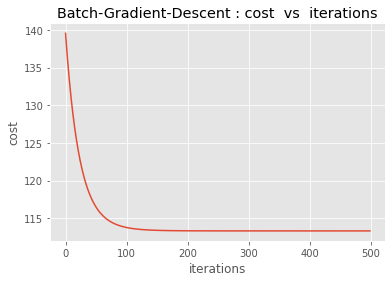

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:103: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Mean Square Error: 0.9804272142317912


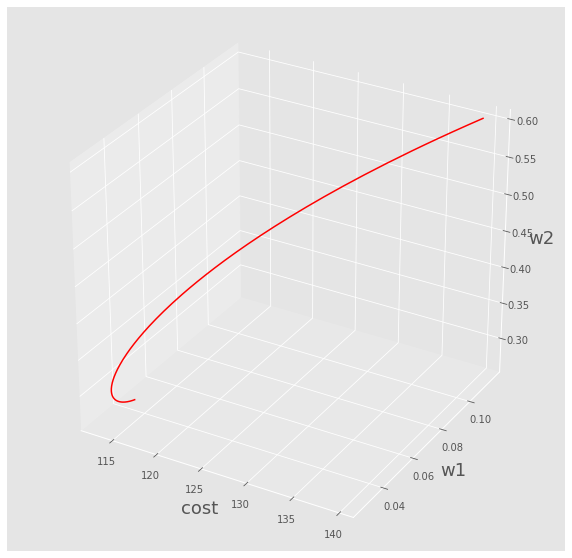

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import time
from tabulate import tabulate
X_train = pd.read_excel("training_feature_matrix.xlsx", index_col=None, header=None).to_numpy(dtype =float)
Y_train= pd.read_excel("training_output.xlsx", index_col=None).to_numpy(dtype =float)
X_test = pd.read_excel("test_feature_matrix.xlsx", index_col=None, header=None).to_numpy(dtype =float)
Y_test = pd.read_excel("test_output.xlsx", index_col=None, header=None).to_numpy(dtype =float)


for i in range(len(X_train[0])):
    X_train[:, i] = ( X_train[:,i] - X_train[:,i].mean() ) / X_train[:,i].std()

for i in range(len(Y_train[0])):
    Y_train[:, i] = ( Y_train[:,i] - Y_train[:,i].mean() ) / Y_train[:,i].std()

for i in range(len(X_test[0])):
    X_test[:, i] = ( X_test[:,i] - X_test[:,i].mean() ) / X_test[:,i].std()

for i in range(len(Y_test[0])):
    Y_test[:, i] = ( Y_test[:,i] - Y_test[:,i].mean() ) / Y_test[:,i].std()

x1 = X_train[0:, 0]
x2 = X_train[0:, 1] 
y = Y_train[0:, 0]

X1 = X_test[0:, 0]
X2 = X_test[0:, 1]
Y = Y_test[0:, 0]

def m_s_e(h, y, rows):
    m_s_e = 0
    for i in range(0, rows):
        m_s_e = m_s_e + (h[i] - y[i]) ** 2
    return m_s_e

def hw(w0, w1, w2, x1, x2):
    hyp = np.ones(x1.shape[0])
    for i in range(0, x1.shape[0]):
        hyp[i] = w0 + w1 * x1[i] + w2 * x2[i]

    return hyp

def su(hyp, rows, y_data, x_data):
    sum = 0
    for i in range(0, rows):
        sum = sum + (hyp[i] - y_data[i]) * x_data[i]
    return sum

    
def batch_gradient_descent(x1, x2, y,iters,alpha):
    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
    x0 = np.ones(x1.shape[0])
    h = hw(w0, w1, w2, x1, x2)
    h = np.ones(x1.shape[0])
    for i in range(0, x1.shape[0]):
        h[i] = w0 + w1 * x1[i] + w2 * x2[i]

    cost = [0 for i in range(iters)]
    w0_list = [1 for i in range(iters)]
    w1_list = [1 for i in range(iters)]
    w2_list = [1 for i in range(iters)]
    for i in range(0, iters):
        w0 = w0 - alpha * su(h, y.shape[0], y, x0)
        w1 = w1 - alpha * su(h, y.shape[0], y, x1)
        w2 = w2 - alpha * su(h, y.shape[0], y, x2)
        w0_list[i] = w0
        w1_list[i] = w1
        w2_list[i] = w2
        h = hw(w0, w1, w2, x1, x2)
        cost[i] = 1 * 0.5 * m_s_e(h, y, y.shape[0])
    return w0, w1, w2, cost, w1_list, w2_list

print("BATCH Gradient Descent")

w0_bgd, w1_bgd, w2_bgd, cost_bgd, w1_list_bgd, w2_list_bgd = batch_gradient_descent(x1, x2, y, 500, 0.00008)
print("W0 :", w0_bgd)
print("W1 :", w1_bgd)
print("W2 :", w2_bgd)

def d2_plot(label1, label2, y, title):
    fig = plt.figure()
    plt.style.use('ggplot')
    plt.rcParams["figure.figsize"] = (10, 10)
    plt.plot(y)
    plt.title(title + " : "+label1 + "  vs  " + label2)
    plt.xlabel(label2)
    plt.ylabel(label1)
    plt.show()


d2_plot("cost", "iterations", cost_bgd, "Batch-Gradient-Descent")
def d3_plot(x, y, z, label1, label2, label3, title):
    fig = plt.figure()
    plt.style.use('ggplot')
    plt.title(title + " : " + label1 + "  vs  " + label2 + " vs "+ label3)
    plt.rcParams["figure.figsize"] = (10, 10)
    ax = plt.axes(projection='3d')
    ax.plot3D(x, y, z, 'red')
    ax.set_xlabel(label1, fontsize=18)
    ax.set_ylabel(label2, fontsize=18)
    ax.set_zlabel(label3, fontsize=18)
d3_plot(cost_bgd, w1_list_bgd, w2_list_bgd, "cost", "w1", "w2", "Batch-Gradient-Descent")
def pred(w0, w1, w2, X1, X2, Y):
    pred = hw(w0, w1, w2, X1, X2)
    mean = np.mean(pred.transpose())
    sdev = np.std(pred.transpose())
  
    pred = pred * sdev + mean
    err = 0
    for i in range(0, pred.shape[0]):
        err = err + (pred[i] - Y[i]) ** 2
    err = err / pred.shape[0]
    print("Mean Square Error:", err)
    return err

m_s_e_bgd = pred(w0_bgd, w1_bgd, w2_bgd, X1, X2, Y)


#Q2

MINI BATCH GRADIENT DESCENT
W0 : 0.0003407262658057784
W1 : 0.04965345857436109
W2 : 0.253912221653495


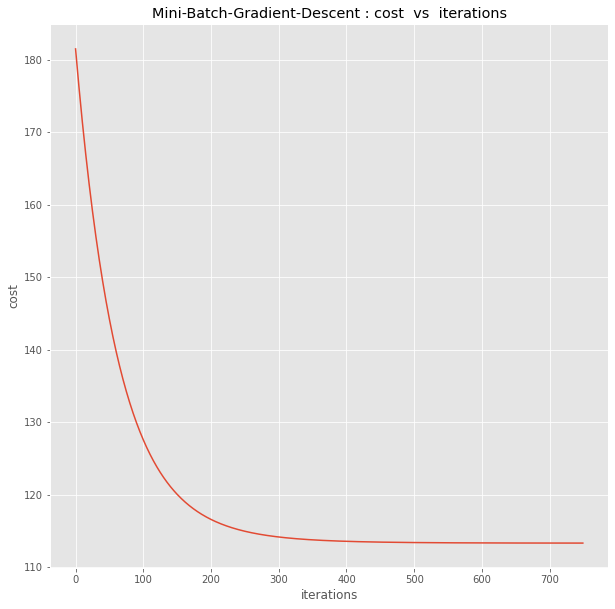

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:102: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Mean Square Error : 0.9810817886767957


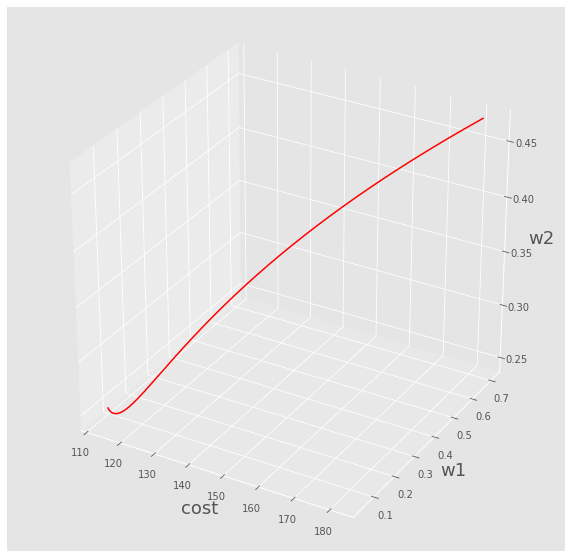

In [ ]:
X_train = pd.read_excel("training_feature_matrix.xlsx", index_col=None, header=None).to_numpy(dtype =float)
Y_train= pd.read_excel("training_output.xlsx", index_col=None).to_numpy(dtype =float)
X_test = pd.read_excel("test_feature_matrix.xlsx", index_col=None, header=None).to_numpy(dtype =float)
Y_test = pd.read_excel("test_output.xlsx", index_col=None, header=None).to_numpy(dtype =float)


for i in range(len(X_train[0])):
    X_train[:, i] = ( X_train[:,i] - X_train[:,i].mean() ) / X_train[:,i].std()

for i in range(len(Y_train[0])):
    Y_train[:, i] = ( Y_train[:,i] - Y_train[:,i].mean() ) / Y_train[:,i].std()

for i in range(len(X_test[0])):
    X_test[:, i] = ( X_test[:,i] - X_test[:,i].mean() ) / X_test[:,i].std()

for i in range(len(Y_test[0])):
    Y_test[:, i] = ( Y_test[:,i] - Y_test[:,i].mean() ) / Y_test[:,i].std()

x1 = X_train[0:, 0]
x2 = X_train[0:, 1] 
y = Y_train[0:, 0]

X1 = X_test[0:, 0]
X2 = X_test[0:, 1]
Y = Y_test[0:, 0]

def hw(w0, w1, w2, x1, x2):
    hyp = np.ones(x1.shape[0])
    for i in range(0, x1.shape[0]):
        hyp[i] = w0 + w1 * x1[i] + w2 * x2[i]

    return hyp

def m_s_e(h, y, rows):
    m_s_e = 0
    for i in range(0, rows):
        m_s_e = m_s_e + (h[i] - y[i]) ** 2
    return m_s_e

def su(hyp, rows, y_data, x_data):
    sum = 0
    for i in range(0, rows):
        sum = sum + (hyp[i] - y_data[i]) * x_data[i]
    return sum

def mini_batch(x1, x2, y):
    iters = 750
    batch = 16
    alpha = 0.0000017
    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
    x0 = np.ones(x1.shape[0])
  
    cost = [0 for i in range(iters)]
    w0_list = [1 for i in range(iters)]
    w1_list = [1 for i in range(iters)]
    w2_list = [1 for i in range(iters)]
    for i in range(0, iters):
        temp = np.column_stack((x1, x2, y))
        np.random.shuffle(temp)
        x1 = temp[0:, 0]
        x2 = temp[0:, 1]
        y = temp[:, 2]
        for j in range(0, batch):
            h = hw(w0, w1, w2, x1, x2)
            w0 = w0 - alpha * su(h, x0.shape[0], y, x0)
            w1 = w1 - alpha * su(h, x1.shape[0], y, x1)
            w2 = w2 - alpha * su(h, x2.shape[0], y, x2)
            w0_list[i] = w0
            w1_list[i] = w1
            w2_list[i] = w2
        h = hw(w0, w1, w2, x1, x2)
        cost[i] = 0.5 * m_s_e(h, y, y.shape[0])
    return w0, w1, w2, cost, w1_list, w2_list



print("MINI BATCH Gradient Descent")

w0_mbgd, w1_mbgd, w2_mbgd, cost_mbgd, w1_list_mbgd, w2_list_mbgd = mini_batch(x1, x2, y)
print("W0 :", w0_mbgd)
print("W1 :", w1_mbgd)
print("W2 :", w2_mbgd)

def d2_plot(label1, label2, y, title):
    fig = plt.figure()
    plt.style.use('ggplot')
    plt.rcParams["figure.figsize"] = (10, 10)
    plt.plot(y)
    plt.title(title + " : "+label1 + "  vs  " + label2)
    plt.xlabel(label2)
    plt.ylabel(label1)
    plt.show()

d2_plot("cost", "iterations", cost_mbgd, "Mini-Batch-Gradient-Descent")
def d3_plot(x, y, z, label1, label2, label3, title):
    fig = plt.figure()
    plt.style.use('ggplot')
    plt.title(title + " : " + label1 + "  vs  " + label2 + " vs "+ label3)
    plt.rcParams["figure.figsize"] = (10, 10)
    ax = plt.axes(projection='3d')
    ax.plot3D(x, y, z, 'red')
    ax.set_xlabel(label1, fontsize=18)
    ax.set_ylabel(label2, fontsize=18)
    ax.set_zlabel(label3, fontsize=18)
    
d3_plot(cost_mbgd, w1_list_mbgd, w2_list_mbgd, "cost", "w1", "w2", "Mini-Batch-Gradient-Descent")

def pred(w0, w1, w2, X1, X2, Y):
    pred = hw(w0, w1, w2, X1, X2)
    mean = np.mean(pred.transpose())
    sdev = np.std(pred.transpose())
  
    pred = pred * sdev + mean
    err = 0
    for i in range(0, pred.shape[0]):
        err = err + (pred[i] - Y[i]) ** 2
    err = err / pred.shape[0]
    print("Mean Square Error :", err)
    return err

m_s_e_mbgd = pred(w0_mbgd, w1_mbgd, w2_mbgd, X1, X2, Y)


STOCHASTIC GRADIENT DESCENT
W0 : 0.012150354989222878
W1 : 0.04428850789906738
W2 : 0.24737361213674944


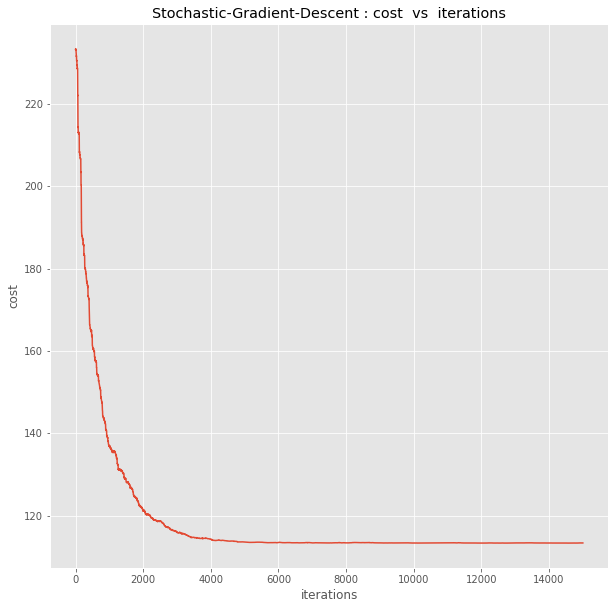

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Mean Square Error: 0.9819904082174958


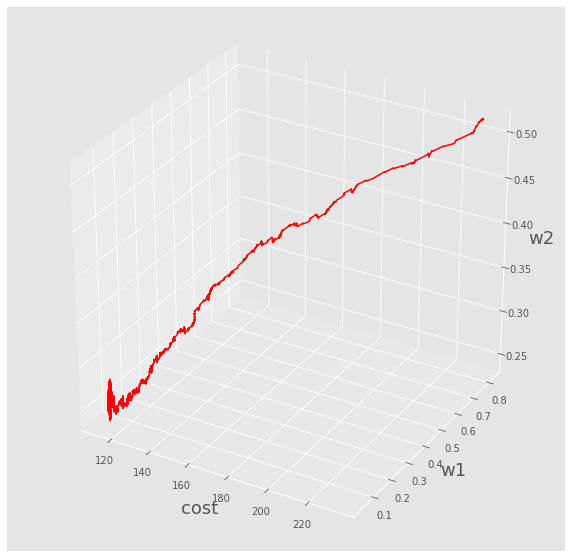

In [ ]:
X_train = pd.read_excel("training_feature_matrix.xlsx", index_col=None, header=None).to_numpy(dtype =float)
Y_train= pd.read_excel("training_output.xlsx", index_col=None).to_numpy(dtype =float)
X_test = pd.read_excel("test_feature_matrix.xlsx", index_col=None, header=None).to_numpy(dtype =float)
Y_test = pd.read_excel("test_output.xlsx", index_col=None, header=None).to_numpy(dtype =float)

for i in range(len(X_train[0])):
    X_train[:, i] = ( X_train[:,i] - X_train[:,i].mean() ) / X_train[:,i].std()

for i in range(len(Y_train[0])):
    Y_train[:, i] = ( Y_train[:,i] - Y_train[:,i].mean() ) / Y_train[:,i].std()

for i in range(len(X_test[0])):
    X_test[:, i] = ( X_test[:,i] - X_test[:,i].mean() ) / X_test[:,i].std()

for i in range(len(Y_test[0])):
    Y_test[:, i] = ( Y_test[:,i] - Y_test[:,i].mean() ) / Y_test[:,i].std()

x1 = X_train[0:, 0]
x2 = X_train[0:, 1] 
y = Y_train[0:, 0]

X1 = X_test[0:, 0]
X2 = X_test[0:, 1]
Y = Y_test[0:, 0]

def hw(w0, w1, w2, x1, x2):
    hyp = np.ones(x1.shape[0])
    for i in range(0, x1.shape[0]):
        hyp[i] = w0 + w1 * x1[i] + w2 * x2[i]

    return hyp

def m_s_e(h, y, rows):
    m_s_e = 0
    for i in range(0, rows):
        m_s_e = m_s_e + (h[i] - y[i]) ** 2
    return m_s_e


def stochastic_gradient_descent(x1, x2, y):
  
    alpha = 0.0005789  
    iter = 15000
 
    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)

    x0 = np.ones(x1.shape[0])
    cost = [0 for i in range(iter)]
    w0_list = [1 for i in range(iter)]
    w1_list = [1 for i in range(iter)]
    w2_list = [1 for i in range(iter)]
    h = hw(w0, w1, w2, x1, x2)
    for itr in range(0, iter):
        i = random.randint(0, y.shape[0] - 1)
        w0 = w0 - alpha * ((h[i] - y[i]) * x0[i])
        w1 = w1 - alpha * ((h[i] - y[i]) * x1[i])
        w2 = w2 - alpha * ((h[i] - y[i]) * x2[i])
        w0_list[itr] = w0
        w1_list[itr] = w1
        w2_list[itr] = w2
        h = hw(w0, w1, w2, x1, x2)
        cost[itr] = 0.5 * m_s_e(h, y, y.shape[0])
    return w0, w1, w2, cost, w1_list, w2_list

 
print("STOCHASTIC Gradient Descent")
w0_sgd, w1_sgd, w2_sgd, cost_sgd, w1_list_sgd, w2_list_sgd = stochastic_gradient_descent(x1, x2, y)
print("W0 :", w0_sgd)
print("W1 :", w1_sgd)
print("W2 :", w2_sgd)
def d2_plot(label1, label2, y, title):
    fig = plt.figure()
    plt.style.use('ggplot')
    plt.rcParams["figure.figsize"] = (10, 10)
    plt.plot(y)
    plt.title(title + " : "+label1 + "  vs  " + label2)
    plt.xlabel(label2)
    plt.ylabel(label1)
    plt.show()
 
d2_plot("cost", "iterations", cost_sgd, "Stochastic-Gradient-Descent")
def d3_plot(x, y, z, label1, label2, label3, title):
    fig = plt.figure()
    plt.style.use('ggplot')
    plt.title(title + " : " + label1 + "  vs  " + label2 + " vs "+ label3)
    plt.rcParams["figure.figsize"] = (10, 10)
    ax = plt.axes(projection='3d')
    ax.plot3D(x, y, z, 'red')
    ax.set_xlabel(label1, fontsize=18)
    ax.set_ylabel(label2, fontsize=18)
    ax.set_zlabel(label3, fontsize=18)
     
d3_plot(cost_sgd, w1_list_sgd, w2_list_sgd, "cost", "w1", "w2", "Stochastic-Gradient-Descent")

def pred(w0, w1, w2, X1, X2, Y):
    pred = hw(w0, w1, w2, X1, X2)
    mean = np.mean(pred.transpose())
    sdev = np.std(pred.transpose())

    pred = pred * sdev + mean
    err = 0
    for i in range(0, pred.shape[0]):
        err = err + (pred[i] - Y[i]) ** 2
    err = err / pred.shape[0]
    print("Mean Square Error:", err)
    return err
 
m_s_e_sgd = pred(w0_sgd, w1_sgd, w2_sgd, X1, X2, Y)


STOCHASTIC GRADIENT DESCENT
W0 : 0.010699581176202767
W1 : 0.0547071997016367
W2 : 0.24318076488229845


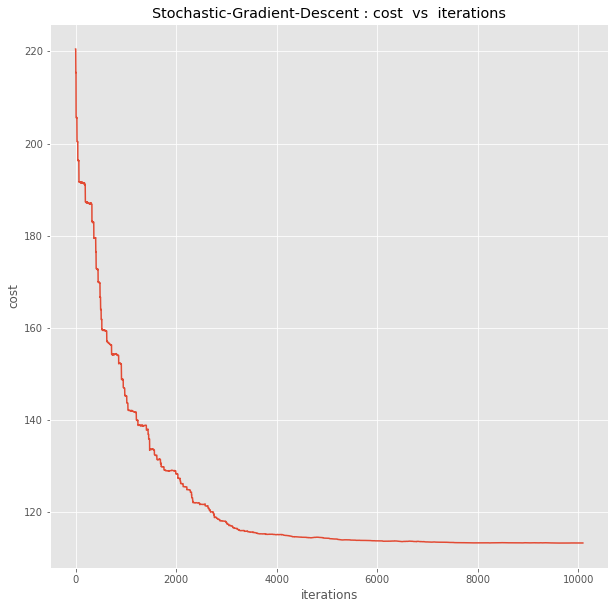

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Mean Square Error: 0.9825026678779678


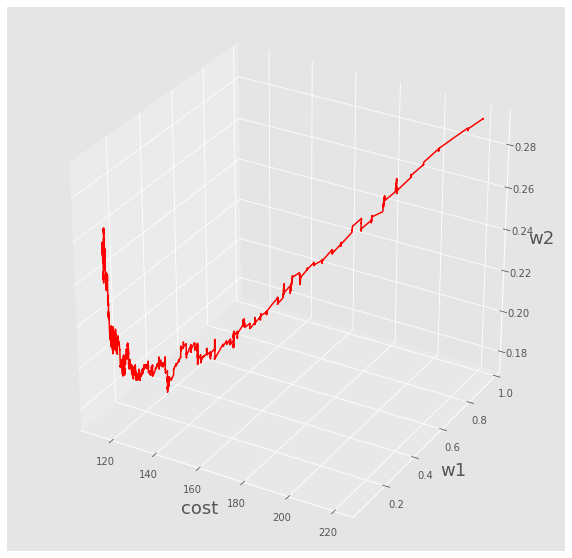

In [ ]:
X_train = pd.read_excel("training_feature_matrix.xlsx", index_col=None, header=None).to_numpy(dtype =float)
Y_train= pd.read_excel("training_output.xlsx", index_col=None).to_numpy(dtype =float)
X_test = pd.read_excel("test_feature_matrix.xlsx", index_col=None, header=None).to_numpy(dtype =float)
Y_test = pd.read_excel("test_output.xlsx", index_col=None, header=None).to_numpy(dtype =float)

for i in range(len(X_train[0])):
    X_train[:, i] = ( X_train[:,i] - X_train[:,i].mean() ) / X_train[:,i].std()

for i in range(len(Y_train[0])):
    Y_train[:, i] = ( Y_train[:,i] - Y_train[:,i].mean() ) / Y_train[:,i].std()

for i in range(len(X_test[0])):
    X_test[:, i] = ( X_test[:,i] - X_test[:,i].mean() ) / X_test[:,i].std()

for i in range(len(Y_test[0])):
    Y_test[:, i] = ( Y_test[:,i] - Y_test[:,i].mean() ) / Y_test[:,i].std()

x1 = X_train[0:, 0]
x2 = X_train[0:, 1] 
y = Y_train[0:, 0]

X1 = X_test[0:, 0]
X2 = X_test[0:, 1]
Y = Y_test[0:, 0]

def hw(w0, w1, w2, x1, x2):
    hyp = np.ones(x1.shape[0])
    for i in range(0, x1.shape[0]):
        hyp[i] = w0 + w1 * x1[i] + w2 * x2[i]

    return hyp
def m_s_e(h, y, rows):
    m_s_e = 0
    for i in range(0, rows):
        m_s_e = m_s_e + (h[i] - y[i]) ** 2
    return m_s_e

def stochastic_gradient_descent(x1, x2, y):

    alpha = 0.000513 
    iter = 10093

    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
  
    x0 = np.ones(x1.shape[0])
    cost = [0 for i in range(iter)]
    w0_list = [1 for i in range(iter)]
    w1_list = [1 for i in range(iter)]
    w2_list = [1 for i in range(iter)]
    h = hw(w0, w1, w2, x1, x2)
    for itr in range(0, iter):
        i = random.randint(0, y.shape[0] - 1)
        w0 = w0 - alpha * ((h[i] - y[i]) * x0[i])
        w1 = w1 - alpha * ((h[i] - y[i]) * x1[i])
        w2 = w2 - alpha * ((h[i] - y[i]) * x2[i])
        w0_list[itr] = w0
        w1_list[itr] = w1
        w2_list[itr] = w2
        h = hw(w0, w1, w2, x1, x2)
        cost[itr] = 0.5 * m_s_e(h, y, y.shape[0])
    return w0, w1, w2, cost, w1_list, w2_list

 
print("STOCHASTIC Gradient Descent")
w0_sgd, w1_sgd, w2_sgd, cost_sgd, w1_list_sgd, w2_list_sgd = stochastic_gradient_descent(x1, x2, y)
print("W0 :", w0_sgd)
print("W1 :", w1_sgd)
print("W2 :", w2_sgd)
def d2_plot(label1, label2, y, title):
    fig = plt.figure()
    plt.style.use('ggplot')
    plt.rcParams["figure.figsize"] = (10, 10)
    plt.plot(y)
    plt.title(title + " : "+label1 + "  vs  " + label2)
    plt.xlabel(label2)
    plt.ylabel(label1)
    plt.show()
 
d2_plot("cost", "iterations", cost_sgd, "Stochastic-Gradient-Descent")
def d3_plot(x, y, z, label1, label2, label3, title):
    fig = plt.figure()
    plt.style.use('ggplot')
    plt.title(title + " : " + label1 + "  vs  " + label2 + " vs "+ label3)
    plt.rcParams["figure.figsize"] = (10, 10)
    ax = plt.axes(projection='3d')
    ax.plot3D(x, y, z, 'red')
    ax.set_xlabel(label1, fontsize=18)
    ax.set_ylabel(label2, fontsize=18)
    ax.set_zlabel(label3, fontsize=18)
     
d3_plot(cost_sgd, w1_list_sgd, w2_list_sgd, "cost", "w1", "w2", "Stochastic-Gradient-Descent")

def pred(w0, w1, w2, X1, X2, Y):
    pred = hw(w0, w1, w2, X1, X2)
    mean = np.mean(pred.transpose())
    sdev = np.std(pred.transpose())

    pred = pred * sdev + mean
    err = 0
    for i in range(0, pred.shape[0]):
        err = err + (pred[i] - Y[i]) ** 2
    err = err / pred.shape[0]
    print("Mean Square Error:", err)
    return err
 
m_s_e_sgd = pred(w0_sgd, w1_sgd, w2_sgd, X1, X2, Y)


#Q3


BATCH GRADIENT DESCENT (RIDGE REGRESSION)
W0 : 0.0037914786611344593
W1 : 0.05035479171451098
W2 : 0.25230661357547934


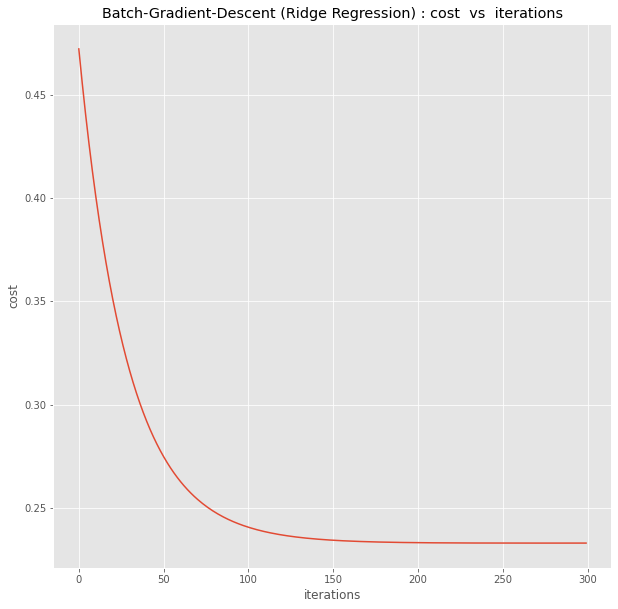

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:96: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Mean Square Error : 0.9812903261258084


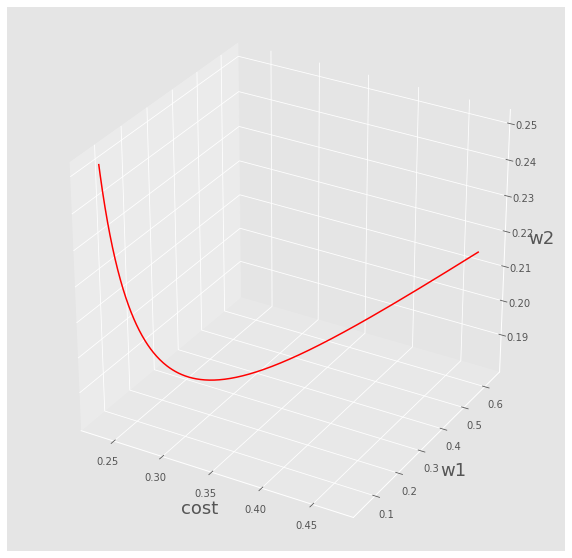

In [ ]:
X_train = pd.read_excel("training_feature_matrix.xlsx", index_col=None, header=None).to_numpy(dtype =float)
Y_train= pd.read_excel("training_output.xlsx", index_col=None).to_numpy(dtype =float)
X_test = pd.read_excel("test_feature_matrix.xlsx", index_col=None, header=None).to_numpy(dtype =float)
Y_test = pd.read_excel("test_output.xlsx", index_col=None, header=None).to_numpy(dtype =float)

for i in range(len(X_train[0])):
    X_train[:, i] = ( X_train[:,i] - X_train[:,i].mean() ) / X_train[:,i].std()

for i in range(len(Y_train[0])):
    Y_train[:, i] = ( Y_train[:,i] - Y_train[:,i].mean() ) / Y_train[:,i].std()

for i in range(len(X_test[0])):
    X_test[:, i] = ( X_test[:,i] - X_test[:,i].mean() ) / X_test[:,i].std()

for i in range(len(Y_test[0])):
    Y_test[:, i] = ( Y_test[:,i] - Y_test[:,i].mean() ) / Y_test[:,i].std()

x1 = X_train[0:, 0]
x2 = X_train[0:, 1] 
y = Y_train[0:, 0]

X1 = X_test[0:, 0]
X2 = X_test[0:, 1]
Y = Y_test[0:, 0]

def hw(w0, w1, w2, x1, x2):
    hyp = np.ones(x1.shape[0])
    for i in range(0, x1.shape[0]):
        hyp[i] = w0 + w1 * x1[i] + w2 * x2[i]

    return hyp

def m_s_e(h, y, rows):
    m_s_e = 0
    for i in range(0, rows):
        m_s_e = m_s_e + (h[i] - y[i]) ** 2
    return m_s_e

def su(hyp, rows, y_data, x_data):
    sum = 0
    for i in range(0, rows):
        sum = sum + (hyp[i] - y_data[i]) * x_data[i]
    return sum
    
def ridge_batch_gradient_descent(x1, x2, y):
    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
    x0 = np.ones(x1.shape[0])
    iters = 300
    alpha = 0.000071
    lamb = 0.0575
    h = hw(w0, w1, w2, x1, x2)
    cost = [0 for i in range(iters)]
    w0_list = [1 for i in range(iters)]
    w1_list = [1 for i in range(iters)]
    w2_list = [1 for i in range(iters)]
    for i in range(0, iters):
        w0 = (1-(alpha*lamb))*w0 - alpha * su(h, y.shape[0], y, x0)
        w1 = (1-(alpha*lamb))*w1 - alpha * su(h, y.shape[0], y, x1)
        w2 = (1-(alpha*lamb))*w2 - alpha * su(h, y.shape[0], y, x2)
        w0_list[i] = w0
        w1_list[i] = w1
        w2_list[i] = w2
        wsum = 0
        wsum = wsum + w0 ** 2
        wsum = wsum + w1 ** 2
        wsum = wsum + w2 ** 2
        h = hw(w0, w1, w2, x1, x2)
        cost[i] = (1 * 0.5 * m_s_e(h, y, y.shape[0])/x1.shape[0] + lamb * wsum) * 0.5
    return w0, w1, w2, cost, w1_list, w2_list


print("BATCH Gradient Descent (RIDGE REGRESSION)")

w0_r_bgd, w1_r_bgd, w2_r_bgd, cost_r_bgd, w1_list_r_bgd, w2_list_r_bgd = ridge_batch_gradient_descent(x1, x2, y)
print("W0 :", w0_r_bgd)
print("W1 :", w1_r_bgd)
print("W2 :", w2_r_bgd)
def d2_plot(label1, label2, y, title):
    fig = plt.figure()
    plt.style.use('ggplot')
    plt.rcParams["figure.figsize"] = (10, 10)
    plt.plot(y)
    plt.title(title + " : "+label1 + "  vs  " + label2)
    plt.xlabel(label2)
    plt.ylabel(label1)
    plt.show()

d2_plot("cost", "iterations", cost_r_bgd, "Batch-Gradient-Descent (Ridge Regression)")
def d3_plot(x, y, z, label1, label2, label3, title):
    fig = plt.figure()
    plt.style.use('ggplot')
    plt.title(title + " : " + label1 + "  vs  " + label2 + " vs "+ label3)
    plt.rcParams["figure.figsize"] = (10, 10)
    ax = plt.axes(projection='3d')
    ax.plot3D(x, y, z, 'red')
    ax.set_xlabel(label1, fontsize=18)
    ax.set_ylabel(label2, fontsize=18)
    ax.set_zlabel(label3, fontsize=18)
    
d3_plot(cost_r_bgd, w1_list_r_bgd, w2_list_r_bgd, "cost", "w1", "w2", "Batch-Gradient-Descent (RIdge Regression)")
def pred(w0, w1, w2, X1, X2, Y):
    pred = hw(w0, w1, w2, X1, X2)
    mean = np.mean(pred.transpose())
    sdev = np.std(pred.transpose())

    pred = pred * sdev + mean
    err = 0
    for i in range(0, pred.shape[0]):
        err = err + (pred[i] - Y[i]) ** 2
    err = err / pred.shape[0]
    print("Mean Square Error :", err)
    return err

m_s_e_r_bgd = pred(w0_r_bgd, w1_r_bgd, w2_r_bgd, X1, X2, Y)


MINI BATCH GRADIENT DESCENT (RIDGE REGRESSION)
W0 : -1.6592289951804998e-16
W1 : 0.04305955980630333
W2 : 0.25892724253523086


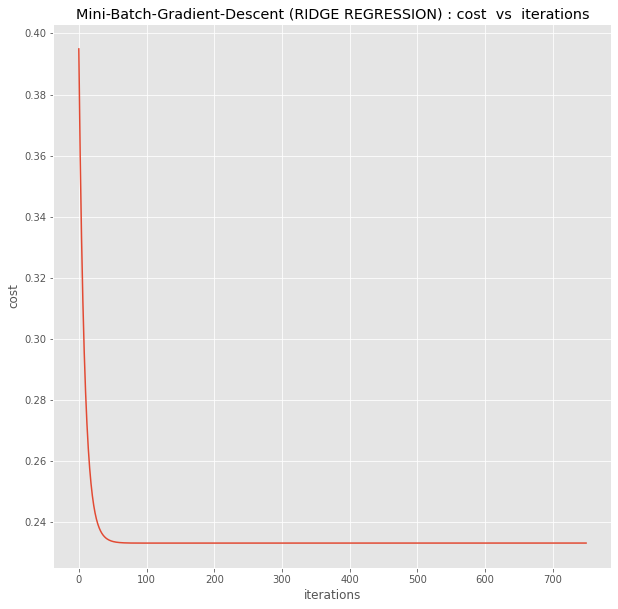

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Mean Square Error: 0.9804470924620386


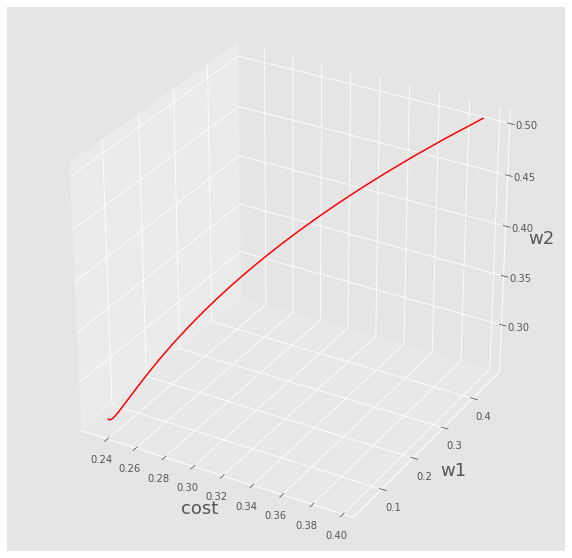

In [ ]:
X_train = pd.read_excel("training_feature_matrix.xlsx", index_col=None, header=None).to_numpy(dtype =float)
Y_train= pd.read_excel("training_output.xlsx", index_col=None).to_numpy(dtype =float)
X_test = pd.read_excel("test_feature_matrix.xlsx", index_col=None, header=None).to_numpy(dtype =float)
Y_test = pd.read_excel("test_output.xlsx", index_col=None, header=None).to_numpy(dtype =float)

for i in range(len(X_train[0])):
    X_train[:, i] = ( X_train[:,i] - X_train[:,i].mean() ) / X_train[:,i].std()

for i in range(len(Y_train[0])):
    Y_train[:, i] = ( Y_train[:,i] - Y_train[:,i].mean() ) / Y_train[:,i].std()

for i in range(len(X_test[0])):
    X_test[:, i] = ( X_test[:,i] - X_test[:,i].mean() ) / X_test[:,i].std()

for i in range(len(Y_test[0])):
    Y_test[:, i] = ( Y_test[:,i] - Y_test[:,i].mean() ) / Y_test[:,i].std()

x1 = X_train[0:, 0]
x2 = X_train[0:, 1] 
y = Y_train[0:, 0]

X1 = X_test[0:, 0]
X2 = X_test[0:, 1]
Y = Y_test[0:, 0]

def hw(w0, w1, w2, x1, x2):
    hyp = np.ones(x1.shape[0])
    for i in range(0, x1.shape[0]):
        hyp[i] = w0 + w1 * x1[i] + w2 * x2[i]

    return hyp

def m_s_e(h, y, rows):
    m_s_e = 0
    for i in range(0, rows):
        m_s_e = m_s_e + (h[i] - y[i]) ** 2
    return m_s_e

def su(hyp, rows, y_data, x_data):
    sum = 0
    for i in range(0, rows):
        sum = sum + (hyp[i] - y_data[i]) * x_data[i]
    return sum

def ridge_mini_batch(x1, x2, y):
    iters = 750
    batch = 16
    alpha = 0.00001371
    lamb = 0.05577
    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
    x0 = np.ones(x1.shape[0])
    
    cost = [0 for i in range(iters)]
    w0_list = [1 for i in range(iters)]
    w1_list = [1 for i in range(iters)]
    w2_list = [1 for i in range(iters)]
    for i in range(0, iters):
        temp = np.column_stack((x1, x2, y))
        np.random.shuffle(temp)
        x1 = temp[0:, 0]
        x2 = temp[0:, 1]
        y = temp[:, 2]
       
        for j in range(0, batch):
            h = hw(w0, w1, w2, x1, x2)
            w0 = (1-(alpha*lamb))*w0 - alpha * su(h, x0.shape[0], y, x0)
            w1 = (1-(alpha*lamb))*w1 - alpha * su(h, x1.shape[0], y, x1)
            w2 = (1-(alpha*lamb))*w2 - alpha * su(h, x2.shape[0], y, x2)
            w0_list[i] = w0
            w1_list[i] = w1
            w2_list[i] = w2
            sum = 0
            sum = sum + w0 ** 2
            sum = sum + w1 ** 2
            sum = sum + w2 ** 2
            wsum =sum
        h = hw(w0, w1, w2, x1, x2)
        cost[i] = (1 * 0.5 * m_s_e(h, y, y.shape[0])/x1.shape[0] + lamb * wsum) * 0.5
    return w0, w1, w2, cost, w1_list, w2_list


print("MINI BATCH Gradient Descent (RIDGE REGRESSION)")

w0_r_mbgd, w1_r_mbgd, w2_r_mbgd, cost_r_mbgd, w1_list_r_mbgd, w2_list_r_mbgd = ridge_mini_batch(x1, x2, y)
print("W0 :", w0_r_mbgd)
print("W1 :", w1_r_mbgd)
print("W2 :", w2_r_mbgd)
def d2_plot(label1, label2, y, title):
    fig = plt.figure()
    plt.style.use('ggplot')
    plt.rcParams["figure.figsize"] = (10, 10)
    plt.plot(y)
    plt.title(title + " : "+label1 + "  vs  " + label2)
    plt.xlabel(label2)
    plt.ylabel(label1)
    plt.show()

d2_plot("cost", "iterations", cost_r_mbgd, "Mini-Batch-Gradient-Descent (RIDGE REGRESSION)")
def d3_plot(x, y, z, label1, label2, label3, title):
    fig = plt.figure()
    plt.style.use('ggplot')
    plt.title(title + " : " + label1 + "  vs  " + label2 + " vs "+ label3)
    plt.rcParams["figure.figsize"] = (10, 10)
    ax = plt.axes(projection='3d')
    ax.plot3D(x, y, z, 'red')
    ax.set_xlabel(label1, fontsize=18)
    ax.set_ylabel(label2, fontsize=18)
    ax.set_zlabel(label3, fontsize=18)
    
d3_plot(cost_r_mbgd, w1_list_r_mbgd, w2_list_r_mbgd, "cost", "w1", "w2", "Mini-Batch-Gradient-Descent (RIDGE REGRESSION)")
def pred(w0, w1, w2, X1, X2, Y):
    pred = hw(w0, w1, w2, X1, X2)
    mean = np.mean(pred.transpose())
    sdev = np.std(pred.transpose())

    pred = pred * sdev + mean
    err = 0
    for i in range(0, pred.shape[0]):
        err = err + (pred[i] - Y[i]) ** 2
    err = err / pred.shape[0]
    print("Mean Square Error:", err)
    return err

m_s_e_r_mbgd = pred(w0_r_mbgd, w1_r_mbgd, w2_r_mbgd, X1, X2, Y)



STOCHASTIC Gradient Descent (RIDGE REGRESSION)
W0 : 0.15528394122691616
W1 : 0.17129434924261225
W2 : 0.2118869636441741


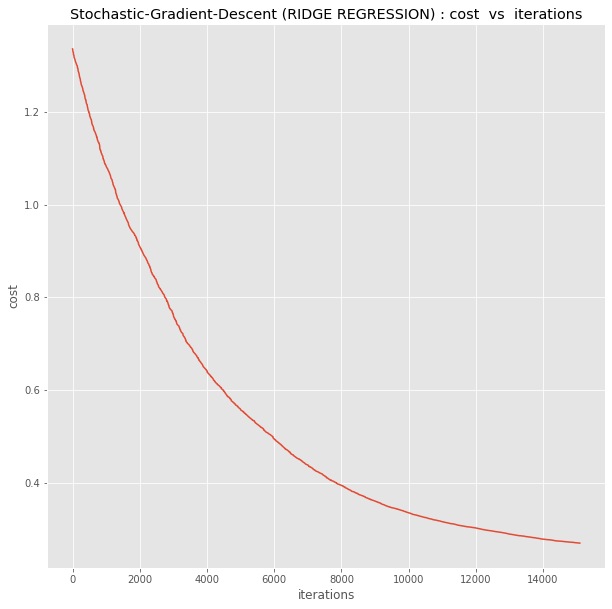

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:96: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Mean Square Error: 1.028371100029011


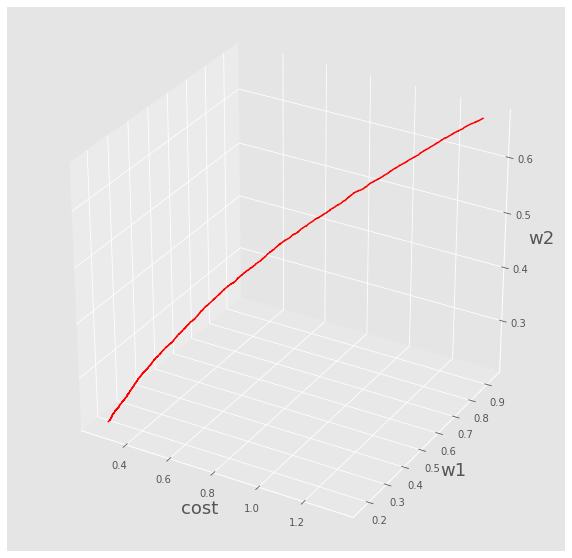

In [ ]:
X_train = pd.read_excel("training_feature_matrix.xlsx", index_col=None, header=None).to_numpy(dtype =float)
Y_train= pd.read_excel("training_output.xlsx", index_col=None).to_numpy(dtype =float)
X_test = pd.read_excel("test_feature_matrix.xlsx", index_col=None, header=None).to_numpy(dtype =float)
Y_test = pd.read_excel("test_output.xlsx", index_col=None, header=None).to_numpy(dtype =float)

for i in range(len(X_train[0])):
    X_train[:, i] = ( X_train[:,i] - X_train[:,i].mean() ) / X_train[:,i].std()

for i in range(len(Y_train[0])):
    Y_train[:, i] = ( Y_train[:,i] - Y_train[:,i].mean() ) / Y_train[:,i].std()

for i in range(len(X_test[0])):
    X_test[:, i] = ( X_test[:,i] - X_test[:,i].mean() ) / X_test[:,i].std()

for i in range(len(Y_test[0])):
    Y_test[:, i] = ( Y_test[:,i] - Y_test[:,i].mean() ) / Y_test[:,i].std()

x1 = X_train[0:, 0]
x2 = X_train[0:, 1] 
y = Y_train[0:, 0]

X1 = X_test[0:, 0]
X2 = X_test[0:, 1]
Y = Y_test[0:, 0]

def hw(w0, w1, w2, x1, x2):
    hyp = np.ones(x1.shape[0])
    for i in range(0, x1.shape[0]):
        hyp[i] = w0 + w1 * x1[i] + w2 * x2[i]

    return hyp

def m_s_e(h, y, rows):
    m_s_e = 0
    for i in range(0, rows):
        m_s_e = m_s_e + (h[i] - y[i]) ** 2
    return m_s_e


def ridge_stochastic_gradient_descent(x1, x2, y):
    
    alpha = 0.0000753173  
    lamb = 0.57
    iter = 15097

    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
   
    x0 = np.ones(x1.shape[0])
    cost = [0 for i in range(iter)]
    w0_list = [1 for i in range(iter)]
    w1_list = [1 for i in range(iter)]
    w2_list = [1 for i in range(iter)]
    h = hw(w0, w1, w2, x1, x2)
    for itr in range(0, iter):
        i = random.randint(0, y.shape[0] - 1)
        w0 = (1- (alpha* lamb ))* w0 - alpha * ((h[i] - y[i]) * x0[i])
        w1 = (1- (alpha* lamb ))* w1 - alpha * ((h[i] - y[i]) * x1[i])
        w2 = (1- (alpha* lamb ))* w2 - alpha * ((h[i] - y[i]) * x2[i])
        w0_list[itr] = w0
        w1_list[itr] = w1
        w2_list[itr] = w2
        sum = 0
        sum = sum + w0 ** 2
        sum = sum + w1 ** 2
        sum = sum + w2 ** 2
        wsum =sum
        h = hw(w0, w1, w2, x1, x2)
        cost[itr] = (1 * 0.5 * m_s_e(h, y, y.shape[0])/x1.shape[0] + lamb * wsum) * 0.5
    return w0, w1, w2, cost, w1_list, w2_list


time.sleep(5)
print("STOCHASTIC Gradient Descent (RIDGE REGRESSION)")
w0_r_sgd, w1_r_sgd, w2_r_sgd, cost_r_sgd, w1_list_r_sgd, w2_list_r_sgd = ridge_stochastic_gradient_descent(x1, x2, y)
print("W0 :", w0_r_sgd)
print("W1 :", w1_r_sgd)
print("W2 :", w2_r_sgd)
def d2_plot(label1, label2, y, title):
    fig = plt.figure()
    plt.style.use('ggplot')
    plt.rcParams["figure.figsize"] = (10, 10)
    plt.plot(y)
    plt.title(title + " : "+label1 + "  vs  " + label2)
    plt.xlabel(label2)
    plt.ylabel(label1)
    plt.show()

d2_plot("cost", "iterations", cost_r_sgd, "Stochastic-Gradient-Descent (RIDGE REGRESSION)")
def d3_plot(x, y, z, label1, label2, label3, title):
    fig = plt.figure()
    plt.style.use('ggplot')
    plt.title(title + " : " + label1 + "  vs  " + label2 + " vs "+ label3)
    plt.rcParams["figure.figsize"] = (10, 10)
    ax = plt.axes(projection='3d')
    ax.plot3D(x, y, z, 'red')
    ax.set_xlabel(label1, fontsize=18)
    ax.set_ylabel(label2, fontsize=18)
    ax.set_zlabel(label3, fontsize=18)
    
d3_plot(cost_r_sgd, w1_list_r_sgd, w2_list_r_sgd, "cost", "w1", "w2", "Stochastic-Gradient-Descent (RIDGE REGRESSION)")

def pred(w0, w1, w2, X1, X2, Y):
    pred = hw(w0, w1, w2, X1, X2)
    mean = np.mean(pred.transpose())
    sdev = np.std(pred.transpose())
    pred = pred * sdev + mean
    err = 0
    for i in range(0, pred.shape[0]):
        err = err + (pred[i] - Y[i]) ** 2
    err = err / pred.shape[0]
    print("Mean Square Error:", err)
    return err

m_s_e_r_sgd = pred(w0_r_sgd, w1_r_sgd, w2_r_sgd, X1, X2, Y)


#Q4


##Derivation of least angle regression (LAR) weight update rule.

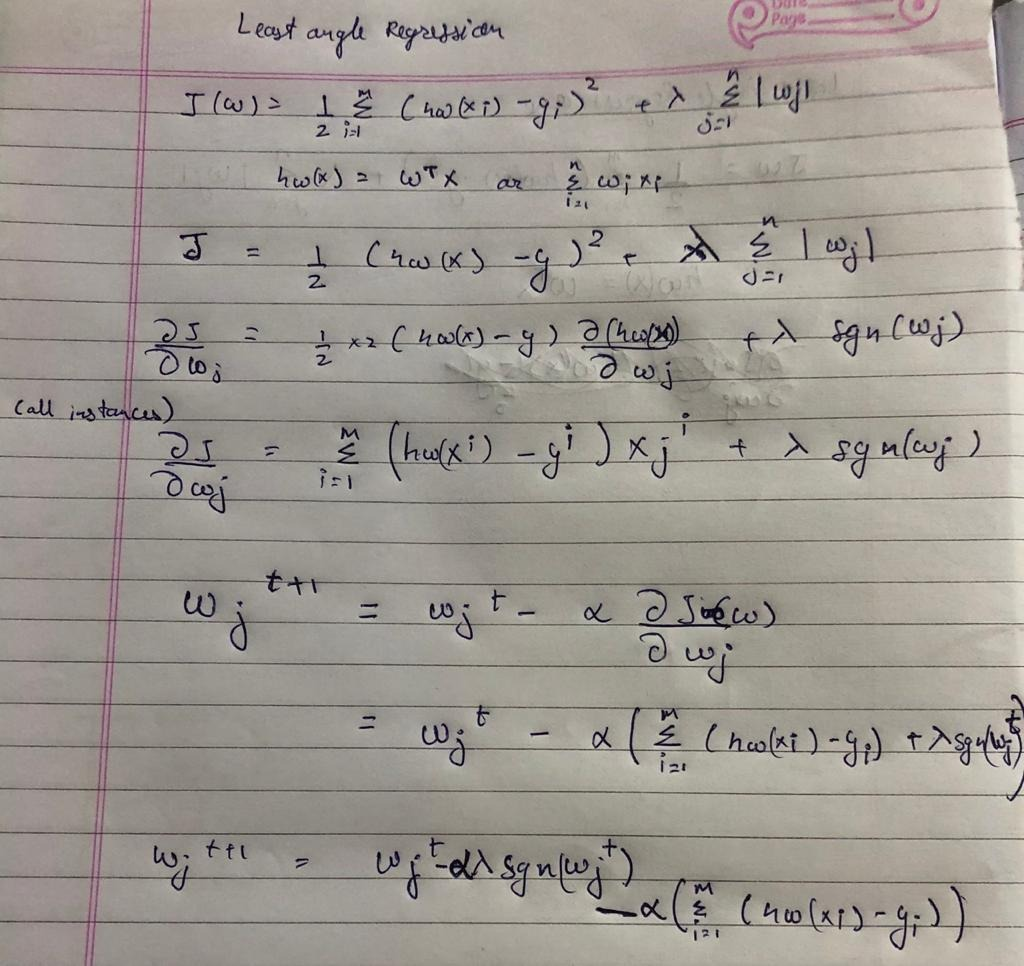

BATCH GRADIENT DESCENT (Least Angle Regression)
W0 : 9.71187383683165e-07
W1 : 0.042230651021830844
W2 : 0.2581650593627845


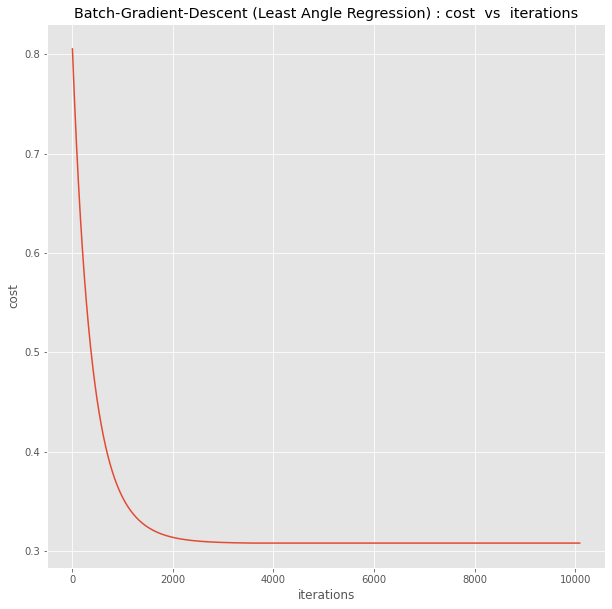

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:92: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Mean Square Error: 0.9805225919861732


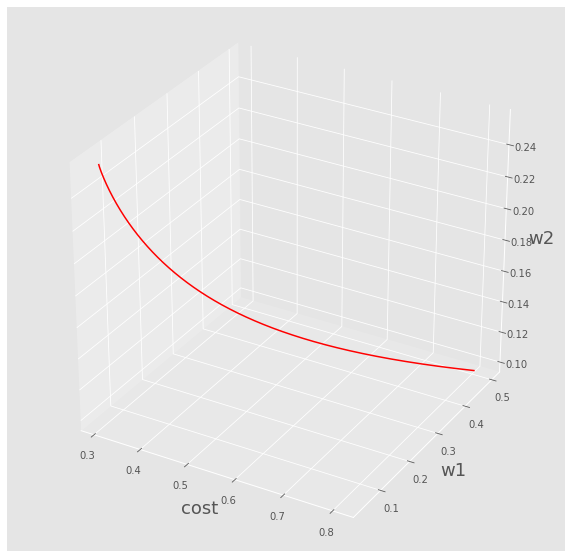

In [ ]:
X_train = pd.read_excel("training_feature_matrix.xlsx", index_col=None, header=None).to_numpy(dtype =float)
Y_train= pd.read_excel("training_output.xlsx", index_col=None).to_numpy(dtype =float)
X_test = pd.read_excel("test_feature_matrix.xlsx", index_col=None, header=None).to_numpy(dtype =float)
Y_test = pd.read_excel("test_output.xlsx", index_col=None, header=None).to_numpy(dtype =float)

for i in range(len(X_train[0])):
    X_train[:, i] = ( X_train[:,i] - X_train[:,i].mean() ) / X_train[:,i].std()

for i in range(len(Y_train[0])):
    Y_train[:, i] = ( Y_train[:,i] - Y_train[:,i].mean() ) / Y_train[:,i].std()

for i in range(len(X_test[0])):
    X_test[:, i] = ( X_test[:,i] - X_test[:,i].mean() ) / X_test[:,i].std()

for i in range(len(Y_test[0])):
    Y_test[:, i] = ( Y_test[:,i] - Y_test[:,i].mean() ) / Y_test[:,i].std()

x1 = X_train[0:, 0]
x2 = X_train[0:, 1] 
y = Y_train[0:, 0]

X1 = X_test[0:, 0]
X2 = X_test[0:, 1]
Y = Y_test[0:, 0]

def hw(w0, w1, w2, x1, x2):
    hyp = np.ones(x1.shape[0])
    for i in range(0, x1.shape[0]):
        hyp[i] = w0 + w1 * x1[i] + w2 * x2[i]
    return hyp

def m_s_e(h, y, rows):
    m_s_e = 0
    for i in range(0, rows):
        m_s_e = m_s_e + (h[i] - y[i]) ** 2
    return m_s_e

def su(hyp, rows, y_data, x_data):
    sum = 0
    for i in range(0, rows):
        sum = sum + (hyp[i] - y_data[i]) * x_data[i]
    return sum

def least_angle_regression_batch(x1,x2,y):
  lamb = 0.5125
  alpha = 0.000007573
  iter = 10093
  w0 = random.uniform(0, 1)
  w1 = random.uniform(0, 1)
  w2 = random.uniform(0, 1)

  x0 = np.ones(x1.shape[0])
  cost = [0 for i in range(iter)]
  w0_list = [1 for i in range(iter)]
  w1_list = [1 for i in range(iter)]
  w2_list = [1 for i in range(iter)]
  for i in range(0,iter):
    h = hw(w0, w1, w2, x1, x2)
    w0 = w0 - alpha * su(h, y.shape[0], y, x0) - alpha * lamb * np.sign(w0) * 0.5
    w1 = w1 - alpha * su(h, y.shape[0], y, x1) - alpha * lamb * np.sign(w1) * 0.5
    w2 = w2 - alpha * su(h, y.shape[0], y, x2) - alpha * lamb * np.sign(w2) * 0.5
    w0_list[i] = w0
    w1_list[i] = w1
    w2_list[i] = w2
    wsum = abs(w0) + abs(w1) + abs(w2)
    cost[i] = (1 * 0.5 * m_s_e(h, y, y.shape[0])/x1.shape[0] + lamb * wsum) * 0.5
  return w0, w1, w2, cost, w1_list, w2_list

print("BATCH Gradient Descent (Least Angle Regression)")

w0_lar_bgd, w1_lar_bgd, w2_lar_bgd, cost_lar_bgd, w1_list_lar_bgd, w2_list_lar_bgd = least_angle_regression_batch(x1, x2, y)
print("W0 :", w0_lar_bgd)
print("W1 :", w1_lar_bgd)
print("W2 :", w2_lar_bgd)
def d2_plot(label1, label2, y, title):
    fig = plt.figure()
    plt.style.use('ggplot')
    plt.rcParams["figure.figsize"] = (10, 10)
    plt.plot(y)
    plt.title(title + " : "+label1 + "  vs  " + label2)
    plt.xlabel(label2)
    plt.ylabel(label1)
    plt.show()


d2_plot("cost", "iterations", cost_lar_bgd, "Batch-Gradient-Descent (Least Angle Regression)")
def d3_plot(x, y, z, label1, label2, label3, title):
    fig = plt.figure()
    plt.style.use('ggplot')
    plt.title(title + " : " + label1 + "  vs  " + label2 + " vs "+ label3)
    plt.rcParams["figure.figsize"] = (10, 10)
    ax = plt.axes(projection='3d')
    ax.plot3D(x, y, z, 'red')
    ax.set_xlabel(label1, fontsize=18)
    ax.set_ylabel(label2, fontsize=18)
    ax.set_zlabel(label3, fontsize=18)
    
d3_plot(cost_lar_bgd, w1_list_lar_bgd, w2_list_lar_bgd, "cost", "w1", "w2", "Batch-Gradient-Descent (Least Angle Regression)")

def pred(w0, w1, w2, X1, X2, Y):
    pred = hw(w0, w1, w2, X1, X2)
    mean = np.mean(pred.transpose())
    sdev = np.std(pred.transpose())
    pred = pred * sdev + mean
    err = 0
    for i in range(0, pred.shape[0]):
        err = err + (pred[i] - Y[i]) ** 2
    err = err / pred.shape[0]
    print("Mean Square Error:", err)
    return err

m_s_e_lar_bgd = pred(w0_lar_bgd, w1_lar_bgd, w2_lar_bgd, X1, X2, Y)


MINI BATCH GRADIENT DESCENT (Least Angle Regression)
W0 : 7.406881315936194e-07
W1 : 0.04222934625818365
W2 : 0.25816636441170016


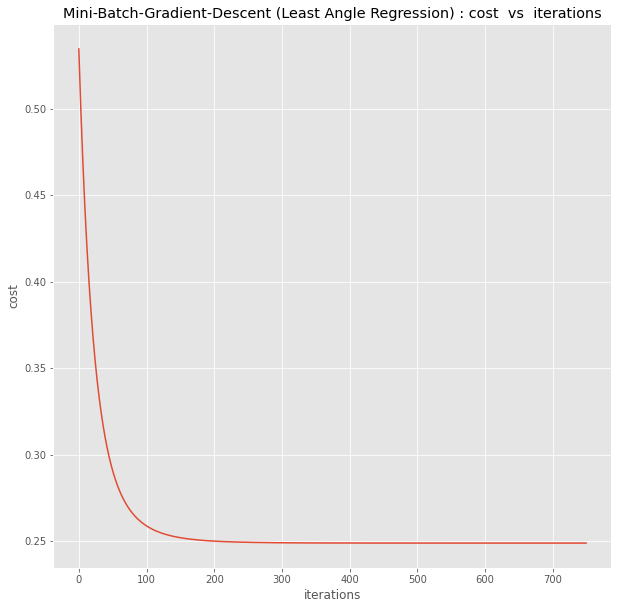

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:105: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Mean Square Error: 0.9805224306629815


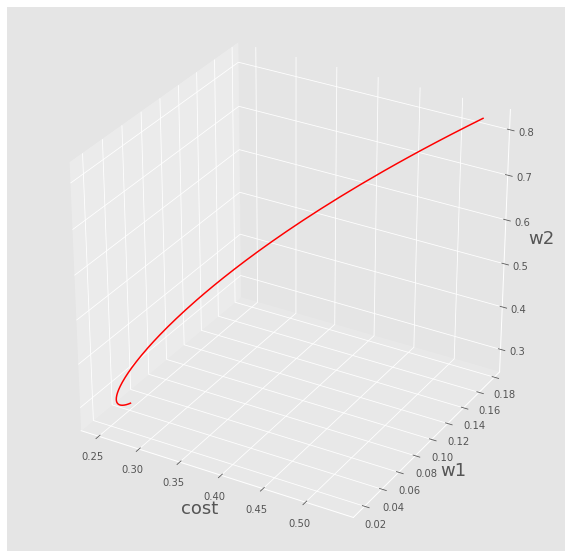

In [ ]:
X_train = pd.read_excel("training_feature_matrix.xlsx", index_col=None, header=None).to_numpy(dtype =float)
Y_train= pd.read_excel("training_output.xlsx", index_col=None).to_numpy(dtype =float)
X_test = pd.read_excel("test_feature_matrix.xlsx", index_col=None, header=None).to_numpy(dtype =float)
Y_test = pd.read_excel("test_output.xlsx", index_col=None, header=None).to_numpy(dtype =float)

for i in range(len(X_train[0])):
    X_train[:, i] = ( X_train[:,i] - X_train[:,i].mean() ) / X_train[:,i].std()

for i in range(len(Y_train[0])):
    Y_train[:, i] = ( Y_train[:,i] - Y_train[:,i].mean() ) / Y_train[:,i].std()

for i in range(len(X_test[0])):
    X_test[:, i] = ( X_test[:,i] - X_test[:,i].mean() ) / X_test[:,i].std()

for i in range(len(Y_test[0])):
    Y_test[:, i] = ( Y_test[:,i] - Y_test[:,i].mean() ) / Y_test[:,i].std()

x1 = X_train[0:, 0]
x2 = X_train[0:, 1] 
y = Y_train[0:, 0]

X1 = X_test[0:, 0]
X2 = X_test[0:, 1]
Y = Y_test[0:, 0]

def hw(w0, w1, w2, x1, x2):
    hyp = np.ones(x1.shape[0])
    for i in range(0, x1.shape[0]):
        hyp[i] = w0 + w1 * x1[i] + w2 * x2[i]

    return hyp

def su(hyp, rows, y_data, x_data):
    sum = 0
    for i in range(0, rows):
        sum = sum + (hyp[i] - y_data[i]) * x_data[i]
    return sum

def m_s_e(h, y, rows):
    m_s_e = 0
    for i in range(0, rows):
        m_s_e = m_s_e + (h[i] - y[i]) ** 2
    return m_s_e


def least_angle_mini_batch(x1, x2, y):
    iters = 750
    batch = 16
    alpha = 0.0000057769
    lamb = 0.5125
    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
    x0 = np.ones(x1.shape[0])
 
    cost = [0 for i in range(iters)]
    w0_list = [1 for i in range(iters)]
    w1_list = [1 for i in range(iters)]
    w2_list = [1 for i in range(iters)]
    for i in range(0, iters):
        temp = np.column_stack((x1, x2, y))
        np.random.shuffle(temp)
        x1 = temp[0:, 0]
        x2 = temp[0:, 1]
        y = temp[:, 2]
 
        for j in range(0, batch):
            h = hw(w0, w1, w2, x1, x2)
            w0 = w0 - alpha * su(h, y.shape[0], y, x0) - alpha * lamb * np.sign(w0) * 0.5
            w1 = w1 - alpha * su(h, y.shape[0], y, x1) - alpha * lamb * np.sign(w1) * 0.5
            w2 = w2 - alpha * su(h, y.shape[0], y, x2) - alpha * lamb * np.sign(w2) * 0.5
            w0_list[i] = w0
            w1_list[i] = w1
            w2_list[i] = w2
            wsum = 0
            wsum = wsum + w0 ** 2
            wsum = wsum + w1 ** 2
            wsum = wsum + w2 ** 2
        h = hw(w0, w1, w2, x1, x2)
        cost[i] = (1 * 0.5 * m_s_e(h, y, y.shape[0])/x1.shape[0] + lamb * wsum) * 0.5
    return w0, w1, w2, cost, w1_list, w2_list

print("MINI BATCH Gradient Descent (Least Angle Regression)")

w0_lar_mbgd, w1_lar_mbgd, w2_lar_mbgd, cost_lar_mbgd, w1_list_lar_mbgd, w2_list_lar_mbgd = least_angle_mini_batch(x1, x2, y)
print("W0 :", w0_lar_mbgd)
print("W1 :", w1_lar_mbgd)
print("W2 :", w2_lar_mbgd)
def d2_plot(label1, label2, y, title):
    fig = plt.figure()
    plt.style.use('ggplot')
    plt.rcParams["figure.figsize"] = (10, 10)
    plt.plot(y)
    plt.title(title + " : "+label1 + "  vs  " + label2)
    plt.xlabel(label2)
    plt.ylabel(label1)
    plt.show()

d2_plot("cost", "iterations", cost_lar_mbgd, "Mini-Batch-Gradient-Descent (Least Angle Regression)")
def d3_plot(x, y, z, label1, label2, label3, title):
    fig = plt.figure()
    plt.style.use('ggplot')
    plt.title(title + " : " + label1 + "  vs  " + label2 + " vs "+ label3)
    plt.rcParams["figure.figsize"] = (10, 10)
    ax = plt.axes(projection='3d')
    ax.plot3D(x, y, z, 'red')
    ax.set_xlabel(label1, fontsize=18)
    ax.set_ylabel(label2, fontsize=18)
    ax.set_zlabel(label3, fontsize=18)
    
d3_plot(cost_lar_mbgd, w1_list_lar_mbgd, w2_list_lar_mbgd, "cost", "w1", "w2", "Mini-Batch-Gradient-Descent (Least Angle Regression)")

def pred(w0, w1, w2, X1, X2, Y):
    pred = hw(w0, w1, w2, X1, X2)
    mean = np.mean(pred.transpose())
    sdev = np.std(pred.transpose())
 
    pred = pred * sdev + mean
    err = 0
    for i in range(0, pred.shape[0]):
        err = err + (pred[i] - Y[i]) ** 2
    err = err / pred.shape[0]
    print("Mean Square Error:", err)
    return err

m_s_e_lar_mbgd = pred(w0_lar_mbgd, w1_lar_mbgd, w2_lar_mbgd, X1, X2, Y)




STOCHASTIC GRADIENT DESCENT (Least Angle Regression)
W0 : -8.960094395048507e-07
W1 : 0.04223118985368885
W2 : 0.25816452063359197


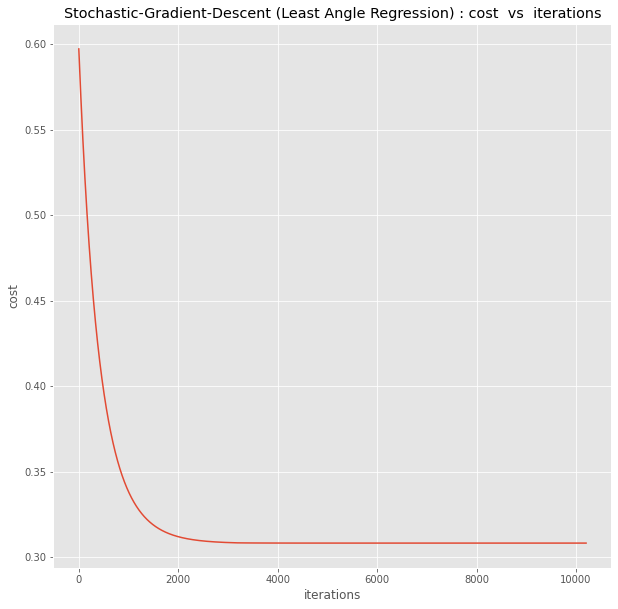

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Mean Square Error: 0.9805226585829572


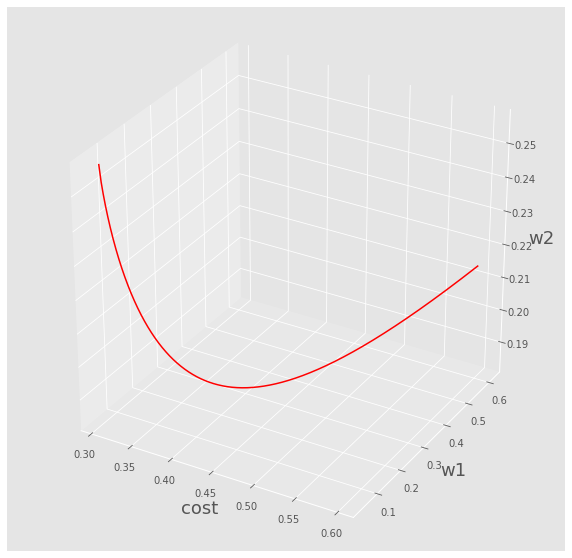

In [ ]:
X_train = pd.read_excel("training_feature_matrix.xlsx", index_col=None, header=None).to_numpy(dtype =float)
Y_train= pd.read_excel("training_output.xlsx", index_col=None).to_numpy(dtype =float)
X_test = pd.read_excel("test_feature_matrix.xlsx", index_col=None, header=None).to_numpy(dtype =float)
Y_test = pd.read_excel("test_output.xlsx", index_col=None, header=None).to_numpy(dtype =float)

for i in range(len(X_train[0])):
    X_train[:, i] = ( X_train[:,i] - X_train[:,i].mean() ) / X_train[:,i].std()

for i in range(len(Y_train[0])):
    Y_train[:, i] = ( Y_train[:,i] - Y_train[:,i].mean() ) / Y_train[:,i].std()

for i in range(len(X_test[0])):
    X_test[:, i] = ( X_test[:,i] - X_test[:,i].mean() ) / X_test[:,i].std()

for i in range(len(Y_test[0])):
    Y_test[:, i] = ( Y_test[:,i] - Y_test[:,i].mean() ) / Y_test[:,i].std()

x1 = X_train[0:, 0]
x2 = X_train[0:, 1] 
y = Y_train[0:, 0]

X1 = X_test[0:, 0]
X2 = X_test[0:, 1]
Y = Y_test[0:, 0]

def su(hyp, rows, y_data, x_data):
    sum = 0
    for i in range(0, rows):
        sum = sum + (hyp[i] - y_data[i]) * x_data[i]
    return sum
def m_s_e(h, y, rows):
    m_s_e = 0
    for i in range(0, rows):
        m_s_e = m_s_e + (h[i] - y[i]) ** 2
    return m_s_e


def least_angle_stochastic_gradient_descent(x1, x2, y):
 
    alpha = 0.0000069873 
    lamb = 0.5125
    iter = 10204
    
    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
 
    x0 = np.ones(x1.shape[0])
    cost = [0 for i in range(iter)]
    w0_list = [1 for i in range(iter)]
    w1_list = [1 for i in range(iter)]
    w2_list = [1 for i in range(iter)]
    h = hw(w0, w1, w2, x1, x2)
    for itr in range(0, iter):
        i = random.randint(0, y.shape[0] - 1)
        w0 = w0 - alpha * su(h, y.shape[0], y, x0) - alpha * lamb * np.sign(w0) * 0.5
        w1 = w1 - alpha * su(h, y.shape[0], y, x1) - alpha * lamb * np.sign(w1) * 0.5
        w2 = w2 - alpha * su(h, y.shape[0], y, x2) - alpha * lamb * np.sign(w2) * 0.5
        w0_list[itr] = w0
        w1_list[itr] = w1
        w2_list[itr] = w2
        
        wsum = abs(w0) + abs(w1) + abs(w2)
        h = hw(w0, w1, w2, x1, x2)
        cost[itr] = (1 * 0.5 * m_s_e(h, y, y.shape[0])/x1.shape[0] + lamb * wsum) * 0.5
    return w0, w1, w2, cost, w1_list, w2_list


time.sleep(5)
print("STOCHASTIC Gradient Descent (Least Angle Regression)")
w0_lar_sgd, w1_lar_sgd, w2_lar_sgd, cost_lar_sgd, w1_list_lar_sgd, w2_list_lar_sgd = least_angle_stochastic_gradient_descent(x1, x2, y)
print("W0 :", w0_lar_sgd)
print("W1 :", w1_lar_sgd)
print("W2 :", w2_lar_sgd)
def d2_plot(label1, label2, y, title):
    fig = plt.figure()
    plt.style.use('ggplot')
    plt.rcParams["figure.figsize"] = (10, 10)
    plt.plot(y)
    plt.title(title + " : "+label1 + "  vs  " + label2)
    plt.xlabel(label2)
    plt.ylabel(label1)
    plt.show()

d2_plot("cost", "iterations", cost_lar_sgd, "Stochastic-Gradient-Descent (Least Angle Regression)")
def d3_plot(x, y, z, label1, label2, label3, title):
    fig = plt.figure()
    plt.style.use('ggplot')
    plt.title(title + " : " + label1 + "  vs  " + label2 + " vs "+ label3)
    plt.rcParams["figure.figsize"] = (10, 10)
    ax = plt.axes(projection='3d')
    ax.plot3D(x, y, z, 'red')
    ax.set_xlabel(label1, fontsize=18)
    ax.set_ylabel(label2, fontsize=18)
    ax.set_zlabel(label3, fontsize=18)
    
d3_plot(cost_lar_sgd, w1_list_lar_sgd, w2_list_lar_sgd, "cost", "w1", "w2", "Stochastic-Gradient-Descent (Least Angle Regression)")

def pred(w0, w1, w2, X1, X2, Y):
    pred = hw(w0, w1, w2, X1, X2)
    mean = np.mean(pred.transpose())
    sdev = np.std(pred.transpose())
 
    pred = pred * sdev + mean
    err = 0
    for i in range(0, pred.shape[0]):
        err = err + (pred[i] - Y[i]) ** 2
    err = err / pred.shape[0]
    print("Mean Square Error:", err)
    return err

m_s_e_lar_sgd = pred(w0_lar_sgd, w1_lar_sgd, w2_lar_sgd, X1, X2, Y)


#Q5

In [ ]:
X_train = pd.read_excel("training_feature_matrix.xlsx", index_col=None, header=None).to_numpy(dtype =float)
Y_train= pd.read_excel("training_output.xlsx", index_col=None).to_numpy(dtype =float)
X_test = pd.read_excel("test_feature_matrix.xlsx", index_col=None, header=None).to_numpy(dtype =float)
Y_test = pd.read_excel("test_output.xlsx", index_col=None, header=None).to_numpy(dtype =float)

def normalize(npm):
    for i in range(len(npm[0])):
        npm[:, i] = ( npm[:,i] - npm[:,i].mean() ) / npm[:,i].std()
    return npm

X_train = normalize(X_train)
Y_train = normalize(Y_train)
X_test = normalize(X_test)
Y_test = normalize(Y_test)

def split(data, op):
  
    x1 = data[0:, 0]
    x2 = data[0:, 1]
    y = op[0:, 0]
    return x1, x2, y

x1, x2, y = split(X_train, Y_train)
X1, X2, Y = split(X_test, Y_test)

def hw_v(theta, X, Y):
  h = (np.matmul(X, theta))
  for i in range(0, h.shape[0]):
      h[i] = h[i]-Y[i]
  return h

def batch_gradient_descent_vi(x, y, w):
    iters = 500
    cost = [0 for i in range(iters)]
    w_list = np.ones(shape = (iters,w.shape[1]))
    y = y.reshape(245,1)
    w = w.T
    for i in range(0,iters):
        w = np.linalg.inv(x.T @ x) @ x.T @ y
    return w

def ridge_batch_gradient_descent_vi(x, y, w):
    iters = 500
    lamb = 0.0125
    cost = [0 for i in range(iters)]
    w_list = np.ones(shape = (iters,w.shape[1]))
    y = y.reshape(245,1)
    w = w.T
    for i in range(0,iters):
        w = np.linalg.inv((x.T @ x) + (lamb * np.identity(3)) ) @ x.T @ y
    return w

def least_angle_batch_gradient_descent_vi(x, y, w):
    iters = 500
    lamb = 0.0125
    cost = [0 for i in range(iters)]
    w_list = np.ones(shape = (iters,w.shape[1]))
    y = y.reshape(245,1)
    w = w.T
    for i in range(0,iters):
        w = np.linalg.inv(x.T @ x) @ ( x.T @ y - ( lamb/2 * np.sign(w) ) )
    return w

def batch_gradient_descent_v(x, y, w):
  theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y)
  k = np.matmul(x, theta)
  k = y - k
  temp = k.T
  cost = (np.matmul(temp, k) *0.5 )/x.shape[0]
  return theta,cost

def pred_v(w, X, Y):
    pred = hw_v(w, X, Y)
    mean = np.mean(pred.transpose())
    sdev = np.std(pred.transpose())

    pred = pred * sdev + mean
    err = 0
    for i in range(0, pred.shape[0]):
        err = err + (pred[i] - Y[i]) ** 2
    err = err / pred.shape[0]
    return err
x0 = np.ones(x1.shape)
X_train = np.column_stack((x0, x1, x2))
X0 = np.ones(X1.shape)
X_test = np.column_stack((X0,X1,X2))
w = np.random.randn(1, 3)
print("LINEAR REGRESSION ")

w_v_bgd = batch_gradient_descent_vi(X_train, y, w)
m_s_e_v_bgd = pred_v(w_v_bgd, X_test, Y)
bgd_table = [["W0",w_v_bgd[0],w0_bgd,w0_mbgd,w0_sgd],["W1",w_v_bgd[1],w1_bgd,w1_mbgd,w1_sgd],["W2",w_v_bgd[2],w2_bgd,w2_mbgd,w2_sgd],["Mean Square Error",m_s_e_v_bgd,m_s_e_bgd,m_s_e_mbgd,m_s_e_sgd]]
print(tabulate(bgd_table,headers = ["Quantities","BGD-Vectorized","BGD","MBGD","SGD"],tablefmt="pretty"))

print("RIDGE REGRESSION")

w_r_v_bgd = ridge_batch_gradient_descent_vi(X_train, y, w)
m_s_e_r_v_bgd = pred_v(w_r_v_bgd, X_test, Y)
bgd_table = [["W0",w_r_v_bgd[0],w0_r_bgd,w0_r_mbgd,w0_r_sgd],["W1",w_r_v_bgd[1],w1_r_bgd,w1_r_mbgd,w1_r_sgd],["W2",w_r_v_bgd[2],w2_r_bgd,w2_r_mbgd,w2_r_sgd],["Mean Square Error",m_s_e_r_v_bgd,m_s_e_r_bgd,m_s_e_r_mbgd,m_s_e_r_sgd]]
print(tabulate(bgd_table,headers = ["Quantities","Ridge-Vectorized","Ridge-BGD","Ridge-MBGD", "Ridge-SGD"],tablefmt="pretty"))

print("LEAST ANGLE REGRESSION")

w_lar_v_bgd = least_angle_batch_gradient_descent_vi(X_train, y, w)
m_s_e_lar_v_bgd = pred_v(w_lar_v_bgd, X_test, Y)
bgd_table = [["W0",w_lar_v_bgd[0],w0_lar_bgd,w0_lar_mbgd,w0_lar_sgd],["W1",w_lar_v_bgd[1],w1_lar_bgd,w1_lar_mbgd,w1_lar_sgd],["W2",w_lar_v_bgd[2],w2_lar_bgd,w2_lar_mbgd,w2_lar_sgd],["Mean Square Error",m_s_e_lar_v_bgd,m_s_e_lar_bgd,m_s_e_lar_mbgd,m_s_e_lar_sgd]]
print(tabulate(bgd_table,headers = ["Quantities","Least Angle - Vectorization","Least Angle - BGD","Least Angle - MBGD","Least Angle - SGD"],tablefmt="pretty"))




LINEAR REGRESSION 
+-------------------+-------------------+-----------------------+----------------------+----------------------+
|    Quantities     |  BGD-Vectorized   |          BGD          |         MBGD         |         SGD          |
+-------------------+-------------------+-----------------------+----------------------+----------------------+
|        W0         | [-2.02962647e-16] | 7.820234319605766e-06 | 0.000698465792524033 | 0.010834245712728745 |
|        W1         |   [0.04305286]    |  0.04316407536345524  | 0.05190492259919419  | 0.04796598708787032  |
|        W2         |    [0.258988]     |  0.25887633675995736  | 0.25166657120566405  |  0.260474974501686   |
| Mean Square Error |   [3.85222457]    |  0.9804540204680856   |  0.9813560344213172  |  0.9805262736511096  |
+-------------------+-------------------+-----------------------+----------------------+----------------------+
RIDGE REGRESSION
+-------------------+-------------------+-----------------------+---

#Q6


[[5.63823529 2.62058824 4.06764706 1.25588235]
 [6.58333333 3.00151515 5.33787879 1.89242424]
 [5.00408163 3.41632653 1.46530612 0.24489796]]


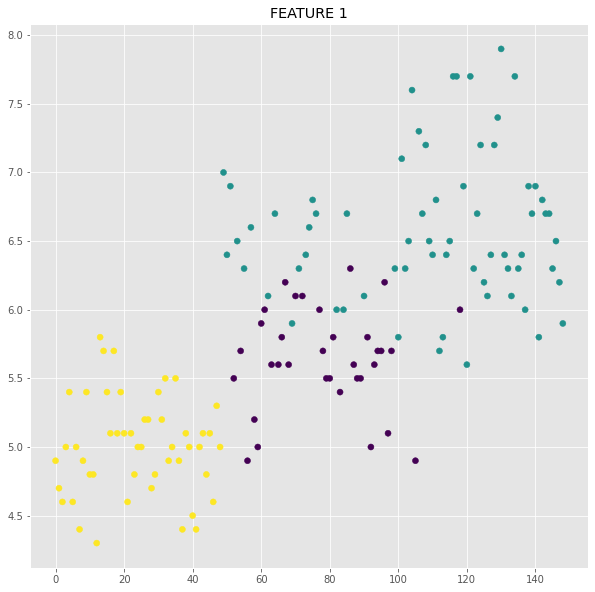

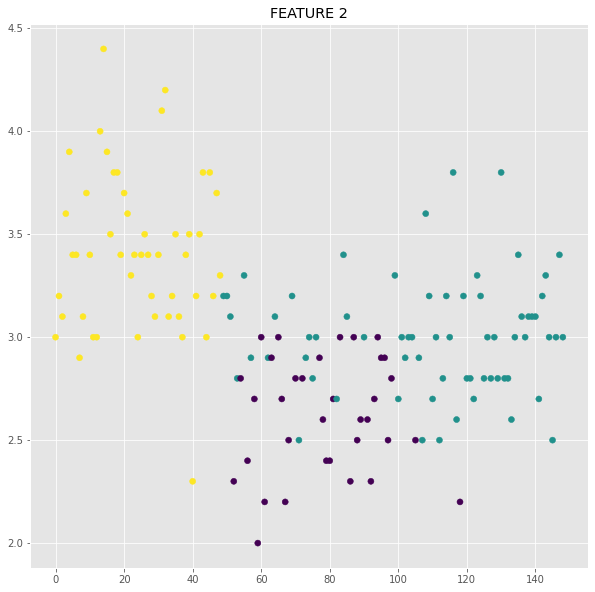

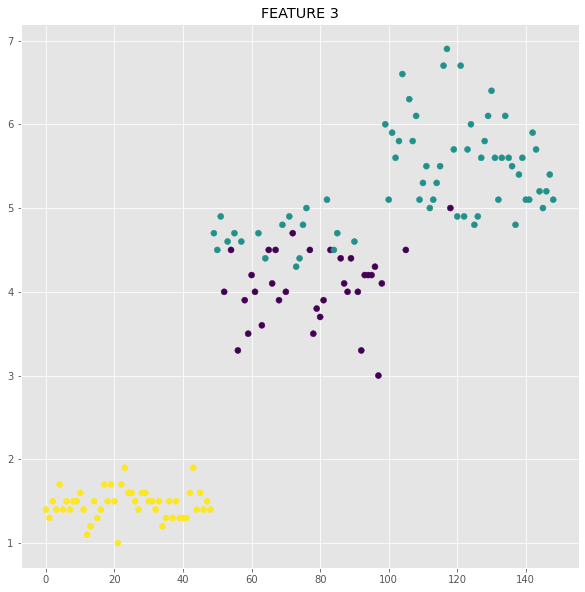

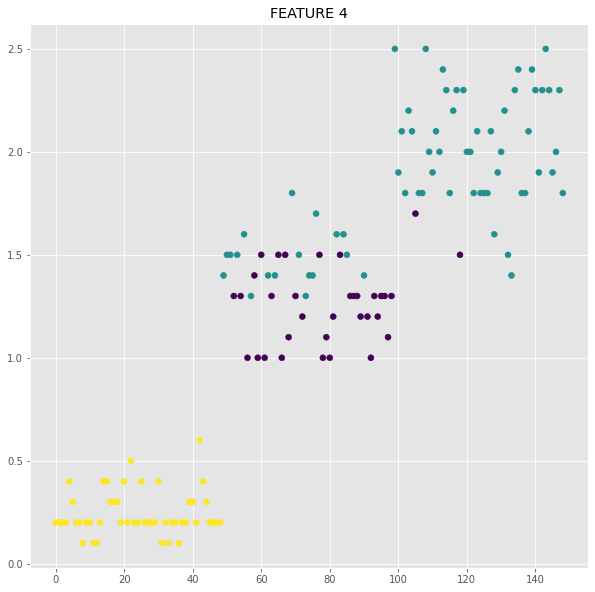

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

def distance(x, y): 
    S = 0;  
    for i in range(len(x)): 
        S += math.pow(x[i]-y[i], 2); 
  
    return math.sqrt(S);
def cluster(item,centroids):
    a = distance(item,centroids[0])
    b = distance(item,centroids[1])
    c = distance(item,centroids[2])
    if  min(a,b,c)==a:
      return 0
    elif min(a,b,c)==b:
      return 1
    else :
      return 2

def KMeansCluster(X, k):
 
  random_indices = np.random.choice(len(X), 3)
 
  centroids = X[random_indices]
 
  iters = 9475
  clusters = np.zeros(len(X))

 

  for it in range(iters):
    for i in range(len(X)):
      clusters[i] = cluster(X[i], centroids)
 

  for i in range(k):
    pts = [X[j] for j in range(len(X)) if clusters[j] == i]
    centroids[i] = np.mean(pts, axis = 0)

  return centroids, clusters
 
k = 3 
df= pd.read_excel('data2.xlsx')

data= np.array(df)

centroids, clusters =  KMeansCluster(data, k)
print(centroids)

  
plt.figure()
plt.scatter(np.arange(len(data)), data[:, 0],c = clusters.flatten())
plt.title('FEATURE 1')
plt.show()
plt.figure()
plt.scatter(np.arange(len(data)), data[:, 1],c = clusters.flatten())
plt.title('FEATURE 2')
plt.show()
plt.figure()
plt.scatter(np.arange(len(data)), data[:, 2],c = clusters.flatten())
plt.title('FEATURE 3')
plt.show()
plt.figure()
plt.scatter(np.arange(len(data)), data[:, 3],c = clusters.flatten())
plt.title('FEATURE 4')
plt.show()

#Q7

Epoch: 0 Loss: 0.9160231674984332
Epoch: 1 Loss: 0.8654551397169823
Epoch: 2 Loss: 0.8184054353986294
Epoch: 3 Loss: 0.7746648083946408
Epoch: 4 Loss: 0.7340222853913506
Epoch: 5 Loss: 0.6962690437475317
Epoch: 6 Loss: 0.6612015034112063
Epoch: 7 Loss: 0.6286236679022825
Epoch: 8 Loss: 0.5983487887767851
Epoch: 9 Loss: 0.5702004488715271
Epoch: 10 Loss: 0.5440131661564221
Epoch: 11 Loss: 0.5196326166596338
Epoch: 12 Loss: 0.49691556560839806
Epoch: 13 Loss: 0.4757295836940043
Epoch: 14 Loss: 0.4559526123523195
Epoch: 15 Loss: 0.4374724294889037
Epoch: 16 Loss: 0.42018605590291624
Epoch: 17 Loss: 0.4039991330891934
Epoch: 18 Loss: 0.3888252951684544
Epoch: 19 Loss: 0.3745855513039103
Epoch: 20 Loss: 0.3612076899260221
Epoch: 21 Loss: 0.34862571219797384
Epoch: 22 Loss: 0.33677929920850985
Epoch: 23 Loss: 0.3256133151908807
Epoch: 24 Loss: 0.31507734747668753
Epoch: 25 Loss: 0.3051252827676494
Epoch: 26 Loss: 0.29571491853771154
Epoch: 27 Loss: 0.2868076078752464
Epoch: 28 Loss: 0.278367

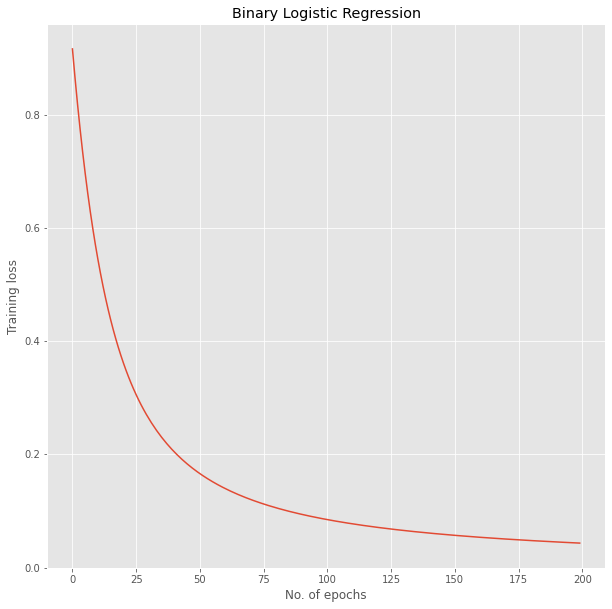

Predicted: 1  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 1  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 1  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 1  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 1  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 1  Actual:1.0
Predicted: 1  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 1  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 1  Actual:1.0
Predicted: 1  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 1  Actual:1.0
Predicted: 1  Actual:1.0
Predicted: 1  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 1  Actual:1.0
Predicted: 1  Actual:1.0
Predicted: 1  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 1  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 1  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def sigmoid(x):
	return 1.0/(1+np.exp(-x))

def sigmoid_der(x):
	return sigmoid(x)*(1-sigmoid(x))

def log_loss(y,y_hat):
	l= -y*np.log(y_hat)
	l-=(1-y)*np.log(1-y_hat)
	return l

def predict(X,w):
	z= X.dot(w)
	y_hat= sigmoid(z)
	y_hat= [1 if y>=0.5 else 0 for y in y_hat]
	return y_hat

epochs=200
lr=0.05

df= pd.read_excel('data3.xlsx')

data= np.array(df)
X= data[:,:-1]
X-=np.mean(X,axis=0)
X/=np.std(X,axis=0)

bias= np.ones((X.shape[0],1))
X= np.hstack((X[:,:-1],bias,X[:,-1:]))

y= data[:,-1]
y-=1
indices = np.array(range(0,X.shape[0]))
num_training_indices = math.floor(0.6 * X.shape[0])
np.random.shuffle(indices)
train_indices = indices[ : num_training_indices]
test_indices = indices[num_training_indices : ]
X_train,X_test = X[train_indices], X[test_indices]
y_train,y_test = y[train_indices], y[test_indices]
 

w= np.random.randn(X.shape[1])
losses=[]

for e in range(epochs):
	z= X_train.dot(w)
	y_hat= sigmoid(z)
	loss= log_loss(y_train,y_hat)
	epoch_loss= np.sum(loss)/y_train.shape[0]
	losses.append(epoch_loss)
	temp= y_hat-y_train
	temp= temp.reshape(y_train.shape[0],1)
	loss_der= temp*X_train
	grad= loss_der.mean(axis=0)
	w-=lr*grad
	print("Epoch: {0} Loss: {1}".format(e,losses[-1]))


plt.plot(losses)
plt.title('Binary Logistic Regression',loc='center')
plt.xlabel('No. of epochs')
plt.ylabel('Training loss')
plt.show()

y_pred= predict(X_test,w)

for i in range(len(y_pred)):
	print("Predicted: {0}  Actual:{1}".format(y_pred[i],round(y_test[i])))

fp=0
fn=0
tp=0
tn=0

for i in range(len(X_test)):
	if y_test[i]==1:
		if y_pred[i]==1:
			tp+=1
		else:
			fn+=1
	else:
		if y_pred[i]==0:
			tn+=1
		else:
			fp+=1

sensitivity= tp/(tp+fn)
specificity= tn/(tn+fp)
accuracy= (tp+tn)/(tp+tn+fp+fn)

print("True Positives: ",tp)
print("False Positives: ",fp)
print("True Negatives: ",tn)
print("False Negatives: ",fn)
print("The sensitivity is {0}".format(sensitivity))
print("The specificity is {0}".format(specificity))
print("The overall accuracy is {0}".format(accuracy))

#Q8


Class 0 vs 1 classifier  Epoch: 0  Loss: 1.5010028184208597
Class 0 vs 1 classifier  Epoch: 1  Loss: 1.336981830119822
Class 0 vs 1 classifier  Epoch: 2  Loss: 1.186507250598948
Class 0 vs 1 classifier  Epoch: 3  Loss: 1.049942687978821
Class 0 vs 1 classifier  Epoch: 4  Loss: 0.9273326926476663
Class 0 vs 1 classifier  Epoch: 5  Loss: 0.8183931944252195
Class 0 vs 1 classifier  Epoch: 6  Loss: 0.7225370027036294
Class 0 vs 1 classifier  Epoch: 7  Loss: 0.6389275513672099
Class 0 vs 1 classifier  Epoch: 8  Loss: 0.5665469385195495
Class 0 vs 1 classifier  Epoch: 9  Loss: 0.5042662021807256
Class 0 vs 1 classifier  Epoch: 10  Loss: 0.45091144553190415
Class 0 vs 1 classifier  Epoch: 11  Loss: 0.40532265947037327
Class 0 vs 1 classifier  Epoch: 12  Loss: 0.36640212798131344
Class 0 vs 1 classifier  Epoch: 13  Loss: 0.3331491480698904
Class 0 vs 1 classifier  Epoch: 14  Loss: 0.30467945598310225
Class 0 vs 1 classifier  Epoch: 15  Loss: 0.2802305679684125
Class 0 vs 1 classifier  Epoch: 1

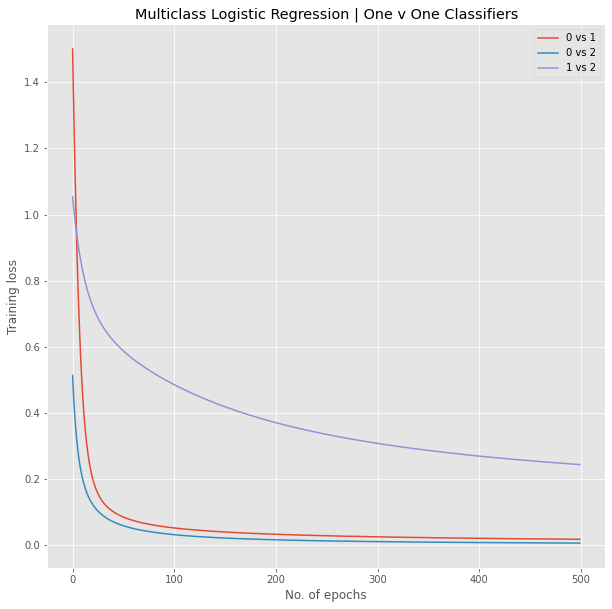

Predicted:0 Actual:0.0
Predicted:0 Actual:0.0
Predicted:0 Actual:0.0
Predicted:1 Actual:1.0
Predicted:1 Actual:1.0
Predicted:0 Actual:0.0
Predicted:2 Actual:1.0
Predicted:0 Actual:0.0
Predicted:0 Actual:0.0
Predicted:0 Actual:0.0
Predicted:2 Actual:2.0
Predicted:0 Actual:0.0
Predicted:1 Actual:1.0
Predicted:1 Actual:1.0
Predicted:2 Actual:2.0
Predicted:2 Actual:2.0
Predicted:1 Actual:1.0
Predicted:1 Actual:1.0
Predicted:1 Actual:1.0
Predicted:0 Actual:0.0
Predicted:1 Actual:1.0
Predicted:0 Actual:0.0
Predicted:2 Actual:2.0
Predicted:2 Actual:2.0
Predicted:2 Actual:2.0
Predicted:1 Actual:1.0
Predicted:1 Actual:1.0
Predicted:2 Actual:2.0
Predicted:0 Actual:0.0
Predicted:2 Actual:2.0
Predicted:1 Actual:1.0
Predicted:2 Actual:2.0
Predicted:2 Actual:2.0
Predicted:2 Actual:2.0
Predicted:1 Actual:1.0
Predicted:1 Actual:1.0
Predicted:1 Actual:1.0
Predicted:0 Actual:0.0
Predicted:2 Actual:1.0
Predicted:0 Actual:0.0
Predicted:1 Actual:1.0
Predicted:0 Actual:0.0
Predicted:2 Actual:2.0
Predicted:2

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt



def sigmoid(x):
	return 1.0/(1+np.exp(-x))

def sigmoid_der(x):
	return sigmoid(x)*(1-sigmoid(x))

def log_loss(y,y_hat):
	l= -y*np.log(y_hat)
	l-=(1-y)*np.log(1-y_hat)
	return l

def assign(i,j,label):
	if label==j:
		return 1
	elif label==i:
		return 0
	return -1


def predict(w,x):
	z= x.dot(w)
	y_hat= sigmoid(z)
	if(y_hat>=0.5): return 1
	return 0

epochs=500
lr=0.1

df= pd.read_excel('data4.xlsx',header=None)

data= np.array(df)
X= data[:,:-1]
X-=np.mean(X,axis=0)
X/=np.std(X,axis=0)

bias= np.ones((X.shape[0],1))
X= np.hstack((X[:,:-1],bias,X[:,-1:]))
y= data[:,-1]
y-=1
classes= len(list(set(y)))
indices = np.array(range(0,X.shape[0]))
num_training_indices = math.floor(0.6 * X.shape[0])
np.random.shuffle(indices)
train_indices = indices[ : num_training_indices]
test_indices = indices[num_training_indices : ]
X_train,X_test = X[train_indices], X[test_indices]
y_train,y_test = y[train_indices], y[test_indices]
 


weights=[]
losses=[]

for i in range(classes):
	row=[]
	for j in range(classes):
		row.append(np.random.randn(X.shape[1]))
	weights.append(row)

plot_labels=[]
for i in range(classes):
	for j in range(i+1,classes):
		w=weights[i][j]
		y_temp= [assign(i,j,label) for label in y_train]
		temp= [y>=0 for y in y_temp]
		y_temp= np.array(y_temp)
		y_temp= y_temp[temp]
		X_temp= X_train[temp]
		row=[]
		plot_labels.append("{0} vs {1}".format(i,j))
		for e in range(epochs):
			z= X_temp.dot(w)
			y_hat= sigmoid(z)
			loss= log_loss(y_temp,y_hat)
			epoch_loss= np.sum(loss)/y_temp.shape[0]
			diff= y_hat-y_temp
			loss_der= diff.T.dot(X_temp)/X_temp.shape[0]
			row.append(epoch_loss)
			print("Class {0} vs {1} classifier  Epoch: {2}  Loss: {3}".format(i,j,e,row[-1]))
			w-=lr*loss_der
			weights[i][j]=w
		losses.append(row)

for row in losses:
	plt.plot(row,label= plot_labels[losses.index(row)])
plt.title('Multiclass Logistic Regression | One v One Classifiers',loc='center')
plt.xlabel('No. of epochs')
plt.ylabel('Training loss')
plt.legend(loc='upper right')
plt.show()

correct=0
y_class= list(y_test)
y_dist= [y_class.count(y) for y in set(y_class)]
y_dist_correct=[0]*classes

for k in range(len(X_test)):
	x=X_test[k]
	votes= [0]*classes
	for i in range(classes):
		for j in range(i+1,classes):
			if predict(weights[i][j],x)==1: votes[j]+=1
			else: votes[i]+=1
	y_pred= votes.index(max(votes))
	print("Predicted:{0} Actual:{1}".format(y_pred,y_test[k]))
	if y_pred==y_test[k]:
		y_dist_correct[y_pred]+=1
		correct+=1


for i in range(classes):
	class_accuracy= y_dist_correct[i]*100/y_dist[i]
	print("The accuracy for class {0} is {1}%".format(i+1,round(class_accuracy)))

print("Out of {0} test cases, {1} were predicted correctly, so the overall accuracy of the model is {2}%".format(len(X_test),correct,correct*100/len(X_test)))

#Q9


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import random
def sigmoid(x):
	return 1.0/(1+np.exp(-x))


def predict(X_test, theta):
    z = np.dot(X_test, theta)
    return sigmoid(z)
 
def J(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def gradientdescent(X, y, lmd, alpha, num_iter, print_cost):

    theta = np.zeros(X.shape[1])
    
    costs = []  
    
    for i in range(num_iter):
        z = np.dot(X, theta)
        h = sigmoid(z)

        reg = lmd / y.size * theta

        reg[0] = 0
        cost = J(h, y)
        
        gradient = np.dot(X.T, (h - y)) / y.size + reg
        theta = theta - alpha * gradient
    
        if print_cost and i % 100 == 0: 
            print('Number of Iterations: ', i, 'Cost : ', cost, 'Theta: ', theta)
        if i % 100 == 0:
            costs.append(cost)
      
    return theta, costs

def logistic(X_train, y_train, X_test, lmd=0.001152, alpha=0.00005675185, num_iter=7500, print_cost = False):

    intercept = np.ones((X_train.shape[0], 1))
    X_train = np.concatenate((intercept, X_train), axis=1)
    
    intercept = np.ones((X_test.shape[0], 1))
    X_test = np.concatenate((intercept, X_test), axis=1)

    u=set(y_train)
    t=[]
    allCosts=[]   
    for c in u:

        ynew = np.array(y_train == c, dtype = int)
        theta_onevsrest, costs_onevsrest = gradientdescent(X_train, ynew, lmd, alpha, num_iter, print_cost)
        t.append(theta_onevsrest)

        allCosts.append(costs_onevsrest)

    pred_test = np.zeros((len(u),len(X_test)))
    for i in range(len(u)):
        pred_test[i,:] = predict(X_test,t[i])

    prediction_test = np.argmax(pred_test, axis=0)
    

    pred_train = np.zeros((len(u),len(X_train)))
    for i in range(len(u)):
        pred_train[i,:] = predict(X_train,t[i])
    

    prediction_train = np.argmax(pred_train, axis=0)
    
    d = {"costs": allCosts,
         "Y_prediction_test": prediction_test, 
         "Y_prediction_train" : prediction_train, 
         "learning_rate" : alpha,
         "num_iterations": num_iter,
         "lambda": lmd}
        
    return d


def cross_validation_split(dataset, folds):
        dataset_split = []
        df_copy = dataset
        fold_size = int(df_copy.shape[0] / folds)
        

        for i in range(folds):
            fold = []
 
            while len(fold) < fold_size:

                r = random.randrange(df_copy.shape[0])

                index = df_copy.index[r]

                fold.append(df_copy.loc[index].values.tolist())

                df_copy = df_copy.drop(index)
  
            dataset_split.append(np.asarray(fold))
            
        return dataset_split 

def kfold(dataset, f=5):
    model=1
    data=cross_validation_split(dataset,f)
    result=[]
    for i in range(f):
        r = list(range(f))
        r.pop(i)
        for j in r :
            if j == r[0]:
                cv = data[j]
            else:    
                cv=np.concatenate((cv,data[j]), axis=0)
          
        c = logistic(cv[:,0:7],cv[:,7],data[i][:,0:7])
        test = c['Y_prediction_test']
        cost = c['costs']
        #plt.plot(cost,label="Cost using Fold {0}".format(model))
        cm=confusion_matrix(data[i][:,7], test)
        acc=(test == data[i][:,7]).sum()
        #ax= sns.heatmap(cm, annot = True, cmap="Greens",cbar=False)
        accuracy = (acc*100)/len(test) 
        print("Accuracy using Fold {0} is {1}%".format(model,round(accuracy,2)))
        result.append(accuracy)
        cm
        model+=1  
    #plt.legend(loc="Upper Right")
    #plt.show()  
    return result

data= pd.read_excel('data4.xlsx',header=None)

accuracies= kfold(data, f=5)
accuracies= np.array(accuracies)
print("Average accuracy with K-Fold cross validation is {0} %".format(round(np.mean(accuracies),2)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


Accuracy using Fold 1 is 26.67%
Accuracy using Fold 2 is 40.0%
Accuracy using Fold 3 is 46.67%
Accuracy using Fold 4 is 30.0%
Accuracy using Fold 5 is 26.67%
Average accuracy with K-Fold cross validation is 34.0 %


#Q10

In [ ]:
import numpy as np
import pandas as pd
import math 
df= pd.read_excel('data3.xlsx')

data= np.array(df)
X= data[:,:-1]
y= data[:,-1]
y-=1

indices = np.array(range(0,X.shape[0]))
num_training_indices = math.floor(0.6 * X.shape[0])
np.random.shuffle(indices)
train_indices = indices[ : num_training_indices]
test_indices = indices[num_training_indices : ]
X_train,X_test = X[train_indices], X[test_indices]
y_train,y_test = y[train_indices], y[test_indices]
 

classes= len(list(set(list(y))))

y_train= list(y_train)
p_y= [y_train.count(y)/len(y_train) for y in list(set(y_train))]
mean_tr=[]
covar_tr=[]

for i in range(classes):
	X_temp=[]
	for j in range(X_train.shape[0]):
		if y_train[j]==i:
			X_temp.append(X_train[j])
	X_temp= np.array(X_temp)
	mean_tr.append(np.mean(X_temp,axis=0))
	covar_tr.append(np.cov(X_temp.T))


fp=0
fn=0
tp=0
tn=0

for j in range(X_test.shape[0]):
	likelihood= [p_y[i]*np.exp(-0.5*(np.transpose(X_test[j]-mean_tr[i]).dot(np.linalg.inv(covar_tr[i])).dot(X_test[j]-mean_tr[i]))) for i in range(classes)]
	y_pred= likelihood.index(max(likelihood))
	print("Predicted: {0}  Actual:{1}".format(y_pred,round(y_test[j])))
	if y_test[j]==1:
		if y_pred==1:
			tp+=1
		else:
			fn+=1
	else:
		if y_pred==0:
			tn+=1
		else:
			fp+=1

sensitivity= tp/(tp+fn)
specificity= tn/(tn+fp)
accuracy= (tp+tn)/(tp+tn+fp+fn)


print("True Positives: ",tp)
print("False Positives: ",fp)
print("True Negatives: ",tn)
print("False Negatives: ",fn)
print("The sensitivity is {0}".format(sensitivity))
print("The specificity is {0}".format(specificity))
print("The overall accuracy is {0}".format(accuracy))

Predicted: 1  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 1  Actual:1.0
Predicted: 1  Actual:1.0
Predicted: 1  Actual:1.0
Predicted: 1  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 1  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 1  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 1  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 1  Actual:1.0
Predicted: 1  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 1  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 1  Actual:1.0
Predicted: 1  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 1  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 1  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 1  Actual:1.0
Predicted: 1  Actual:1.0
Predicted: 1  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 1  Actual:1.0


#Q11

In [ ]:
import numpy as np
import pandas as pd


df= pd.read_excel('data4.xlsx',header=None)

data= np.array(df)
X= data[:,:-1]
y= data[:,-1]
y-=1
indices = np.array(range(0,X.shape[0]))
num_training_indices = math.floor(0.7 * X.shape[0])
np.random.shuffle(indices)
train_indices = indices[ : num_training_indices]
test_indices = indices[num_training_indices : ]
X_train,X_test = X[train_indices], X[test_indices]
y_train,y_test = y[train_indices], y[test_indices]
 
classes= len(list(set(list(y))))

y_test= list(y_test)
dist_y_test= [y_test.count(y) for y in list(set(y_test))]
y_train= list(y_train)
dist_y_train= [y_test.count(y) for y in list(set(y_train))]
prob_y_train=[ dist/len(y_train) for dist in dist_y_train]
dist_y_correct= [0]*classes
mean_tr=[]
covar_tr=[]

for i in range(classes):
	X_temp=[]
	for j in range(X_train.shape[0]):
		if y_train[j]==i:
			X_temp.append(X_train[j])
	X_temp= np.array(X_temp)
	mean_tr.append(np.mean(X_temp,axis=0))
	covar_tr.append(np.cov(X_temp.T))

correct=0

for j in range(X_test.shape[0]):
	likelihood= [prob_y_train[i]*np.exp(-0.5*(np.transpose(X_test[j]-mean_tr[i]).dot(np.linalg.inv(covar_tr[i])).dot(X_test[j]-mean_tr[i]))) for i in range(classes)]
	y_pred= likelihood.index(max(likelihood))
	print("Predicted: {0}  Actual:{1}".format(y_pred,round(y_test[j])))
	if y_pred==y_test[j]:
		dist_y_correct[y_pred]+=1
		correct+=1

for i in range(classes):
	class_accuracy= dist_y_correct[i]*100/dist_y_test[i]
	print("The accuracy for class {0} is {1}%".format(i+1,round(class_accuracy)))

print("Out of {1} test cases, {0} were predicted correctly, so the overall accuracy of the model is {2}%".format(correct,len(X_test),round(correct*100/len(X_test))))

Predicted: 0  Actual:0.0
Predicted: 2  Actual:1.0
Predicted: 2  Actual:2.0
Predicted: 0  Actual:0.0
Predicted: 1  Actual:1.0
Predicted: 1  Actual:1.0
Predicted: 1  Actual:1.0
Predicted: 2  Actual:2.0
Predicted: 0  Actual:0.0
Predicted: 1  Actual:1.0
Predicted: 2  Actual:2.0
Predicted: 1  Actual:1.0
Predicted: 1  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 2  Actual:2.0
Predicted: 1  Actual:2.0
Predicted: 2  Actual:2.0
Predicted: 1  Actual:1.0
Predicted: 1  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 2  Actual:2.0
Predicted: 0  Actual:0.0
Predicted: 2  Actual:1.0
Predicted: 1  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 2  Actual:2.0
Predicted: 2  Actual:2.0
Predicted: 2  Actual:2.0
Predicted: 2  Actual:2.0
Predicted: 2  Actual:2.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 2  Actual:2.0
Predicted: 0  Actual:0.0
Predicted: 2  Actual:2.0
Predicted: 1  Actual:1.0
Predicted: 1  Actual:1.0
Predicted: 2  Actual:2.0
Predicted: 1  Actual:1.0


#12


In [ ]:
import numpy as np
import pandas as pd

df= pd.read_excel('data4.xlsx',header=None)

data= np.array(df)
X= data[:,:-1]
y= data[:,-1]
y-=1
indices = np.array(range(0,X.shape[0]))
num_training_indices = math.floor(0.7 * X.shape[0])
np.random.shuffle(indices)
train_indices = indices[ : num_training_indices]
test_indices = indices[num_training_indices : ]
X_train,X_test = X[train_indices], X[test_indices]
y_train,y_test = y[train_indices], y[test_indices]
 
classes= len(list(set(list(y))))

y_test= list(y_test)
dist_y_tr= [y_test.count(y) for y in list(set(y_test))]
dist_y_correct= [0]*classes
mean_tr=[]
covar_tr=[]

for i in range(classes):
	X_temp=[]
	for j in range(X_train.shape[0]):
		if y_train[j]==i:
			X_temp.append(X_train[j])
	X_temp= np.array(X_temp)
	mean_tr.append(np.mean(X_temp,axis=0))
	covar_tr.append(np.cov(X_temp.T))

correct=0

for j in range(X_test.shape[0]):
	likelihood= [np.exp(-0.5*(np.transpose(X_test[j]-mean_tr[i]).dot(np.linalg.inv(covar_tr[i])).dot(X_test[j]-mean_tr[i]))) for i in range(classes)]
	y_pred= likelihood.index(max(likelihood))
	print("Predicted: {0}  Actual:{1}".format(y_pred,round(y_test[j])))
	if y_pred==y_test[j]:
		dist_y_correct[y_pred]+=1
		correct+=1

for i in range(classes):
	class_accuracy= dist_y_correct[i]*100/dist_y_tr[i]
	print("The accuracy for class {0} is {1}%".format(i+1,round(class_accuracy)))

print("Out of {1} test cases, {0} were predicted correctly, so the overall accuracy of the model is {2}%".format(correct,len(X_test),round(correct*100/len(X_test))))



Predicted: 2  Actual:2.0
Predicted: 2  Actual:1.0
Predicted: 2  Actual:2.0
Predicted: 0  Actual:0.0
Predicted: 1  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 1  Actual:1.0
Predicted: 2  Actual:2.0
Predicted: 2  Actual:2.0
Predicted: 2  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 1  Actual:1.0
Predicted: 2  Actual:2.0
Predicted: 2  Actual:1.0
Predicted: 1  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 2  Actual:2.0
Predicted: 2  Actual:2.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 1  Actual:1.0
Predicted: 1  Actual:1.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 2  Actual:2.0
Predicted: 1  Actual:1.0
Predicted: 2  Actual:2.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 0  Actual:0.0
Predicted: 2  Actual:2.0
Predicted: 2  Actual:2.0
Predicted: 2  Actual:2.0
Predicted: 0  Actual:0.0
